In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Python\projects\wego-the-brotherhood-of-steel\data\Headway_Data_8-1-2023_to_9-30-2023.csv')

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [3]:
wego['TRIP_EDGE'].value_counts()

TRIP_EDGE
0    215185
2     67728
1     67416
Name: count, dtype: int64

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
wego_trimmed = wego

In [6]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [7]:
wego_trimmed = wego.dropna(subset= ['ADHERENCE','SCHEDULED_HDWY', 'ACTUAL_HDWY' ])
wego_trimmed = wego_trimmed[wego_trimmed['PREV_SCHED_STOP_CANCELLED'] != 1]
wego_trimmed = wego_trimmed[wego_trimmed['STOP_CANCELLED'] != 1]
wego_trimmed = wego_trimmed[wego_trimmed['SCHEDULED_HDWY'] != 0]
wego_trimmed = wego_trimmed[wego_trimmed['ADHERENCE'] > -60]
wego_trimmed = wego_trimmed[wego_trimmed['ADHERENCE'] < 60]
wego_trimmed = wego_trimmed[wego_trimmed['SCHEDULED_HDWY'] >= 5]

In [8]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN


In [9]:
wego_trimmed['TRIP_EDGE'].value_counts()

TRIP_EDGE
0    199182
1     62230
Name: count, dtype: int64

In [10]:
def route_name(ROUTE_ABBR):
    if ROUTE_ABBR == 3: 
        return 'West End'
    elif ROUTE_ABBR == 7: 
        return 'Hillsboro'
    elif ROUTE_ABBR == 22: 
        return 'Bordeaux'
    elif ROUTE_ABBR == 23: 
        return 'Dickerson Pike'
    elif ROUTE_ABBR == 50:
        return 'Charlotte Pike'
    elif ROUTE_ABBR == 52: 
        return 'Nolensville Pike'
    elif ROUTE_ABBR == 55:
        return 'Murfreesboro Pike'
    elif ROUTE_ABBR == 56: 
        return 'Gallatin Pike'
    else:
        return 'none'

wego_trimmed['ROUTE_NAME'] = wego_trimmed['ROUTE_ABBR'].apply(route_name)

wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro


In [11]:
def week_day(SERVICE_ABBR):
    if SERVICE_ABBR == 1:
        return  'Weekday'
    elif SERVICE_ABBR == 2:
        return 'Saturday'
    elif SERVICE_ABBR == 3:
        return 'Sunday'
    else:
        return 'none'
    
wego_trimmed['DAY_OF_WEEK'] = wego_trimmed['SERVICE_ABBR'].apply(week_day)

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [12]:
# wego_trimmed = wego.dropna(subset= ['ADHERENCE','SCHEDULED_HDWY', 'ACTUAL_HDWY' ])
# wego_trimmed = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]
# wego_trimmed = wego[wego['STOP_CANCELLED'] != 1]
# wego_trimmed = wego[wego['SCHEDULED_HDWY'] != 0]
# # wego_trimmed = wego[wego['ADHERENCE'] > -60]
# # wego_trimmed = wego[wego['ADHERENCE'] < 60]

In [13]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [14]:
# wego_trimmed = wego.dropna()
# wego_trimmed

In [15]:
wego_trimmed['HDWY_DEVIATION_PERC'] = wego_trimmed['ACTUAL_HDWY'] / wego_trimmed['SCHEDULED_HDWY'] * 100

In [16]:
wego_trimmed.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107


In [17]:
wego_trimmed.describe()    

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,2.614120e+05,261412.000000,2.614120e+05,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.0,261412.0,261412.000000,261410.000000,51528.000000,261412.000000
mean,1.202309e+08,1.293919,1.001038e+08,39.401026,3948.129015,1946.241680,351651.114463,0.003535,7.452194,0.238053,36.157194,-86.767767,-3.384132,17.964657,18.415675,0.451017,0.033002,0.170057,0.796941,0.0,0.0,0.013542,3.596419,12.728749,102.406120
std,5.062277e+01,0.628313,3.232009e+05,20.234919,2022.812768,773.227714,1472.775888,0.071026,3.913822,0.425893,0.058217,0.065596,4.630264,11.686444,13.757169,6.762115,0.178641,0.375684,0.402277,0.0,0.0,0.115579,7.125966,6.405680,39.853970
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,56.000000,345106.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-59.816666,5.000000,0.000000,-55.533334,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-4.116666,0.000000,0.000000
25%,1.202308e+08,1.000000,9.989087e+07,23.000000,2300.000000,1379.000000,350998.000000,0.000000,4.000000,0.000000,36.126788,-86.814220,-4.600000,10.000000,10.983333,-2.316667,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,85.833330
50%,1.202308e+08,1.000000,1.001345e+08,52.000000,5201.000000,2001.000000,352052.000000,0.000000,7.000000,0.000000,36.149997,-86.768557,-2.200000,15.000000,16.100000,0.033333,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,100.166660
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5506.000000,2585.000000,352676.000000,0.000000,10.000000,0.000000,36.179753,-86.714100,-0.666666,20.000000,23.033333,2.450000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,2.933333,16.000000,115.333330
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9950.000000,3173.000000,354098.000000,4.000000,17.000000,1.000000,36.307973,-86.636496,34.333333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,0.0,0.0,1.000000,262.900000,118.000000,2361.733332


In [18]:
wego_trimmed[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ADHERENCE']].sort_values('ADHERENCE')

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE
190035,2023-09-02,120230902,352392,55,MXTHOMP,0,2023-09-02 14:40:00,-59.816666
272349,2023-09-17,120230917,352548,55,MXWHARF,0,2023-09-17 15:48:00,-59.750000
272364,2023-09-17,120230917,352550,55,MXBELL,0,2023-09-17 18:16:00,-59.750000
190631,2023-09-02,120230902,352673,55,MXWHARF,0,2023-09-02 17:02:00,-59.733333
52905,2023-08-09,120230809,353361,7,21BK,0,2023-08-09 16:47:00,-59.600000
...,...,...,...,...,...,...,...,...
129546,2023-08-23,120230823,351240,3,MP&R,1,2023-08-23 16:21:00,31.183333
52878,2023-08-09,120230809,353352,7,21BK,0,2023-08-09 10:27:00,32.166666
24411,2023-08-04,120230804,352738,56,GXRVRGAT,0,2023-08-04 09:21:00,32.800000
121608,2023-08-22,120230822,350313,23,DWMRT,1,2023-08-22 13:49:00,33.633333


# 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [19]:
# this would have to do with Adherence - is the bus running on time (+ number) or is it running late (- number)? 

In [20]:
# no more than 6 mins late or 1 min early      # negative is LATE  # positive is EARLY

In [21]:
early_buses = wego_trimmed[wego_trimmed['ADJUSTED_EARLY_COUNT'] == 1]
early_buses
# early_buses = wego_trimmed[wego_trimmed['ADHERENCE'] > 1 & (wego_trimmed['ADHERENCE'] < -7)]
# early_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 09:26:00,2023-08-01 09:24:44,2023-08-01 09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,65.520831
38,120230801,1,99457928,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 10:21:00,2023-08-01 10:19:07,2023-08-01 10:19:07,1.883333,12.0,8.850000,-3.150000,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,73.750000
113,120230801,1,99458003,2023-08-01,22,2200,2689,345138,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 23:15:00,2023-08-01 23:06:47,2023-08-01 23:06:47,8.216666,30.0,19.683333,-10.316667,1,0,0,0,0.0,0,0.000000,7.0,Bordeaux,Weekday,65.611110
181,120230801,1,99458073,2023-08-01,22,2201,2427,345228,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 13:42:00,2023-08-01 13:40:33,2023-08-01 13:40:33,1.450000,12.0,11.716666,-0.283334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,97.638883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349999,120230930,2,100406077,2023-09-30,56,5604,2567,352966,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 14:18:00,2023-09-30 14:15:48,2023-09-30 14:15:48,2.200000,20.0,5.650000,-14.350000,1,0,0,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,28.250000
350000,120230930,2,100406078,2023-09-30,56,5604,2567,352966,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 14:23:00,2023-09-30 14:18:34,2023-09-30 14:21:00,2.000000,20.0,4.966666,-15.033334,1,0,0,0,0.0,0,2.433333,NaN,Gallatin Pike,Saturday,24.833330
350192,120230930,2,100406476,2023-09-30,7,701,2062,353374,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 10:45:00,2023-09-30 10:43:11,2023-09-30 10:43:11,1.816666,30.0,27.283333,-2.716667,1,0,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,90.944443
350258,120230930,2,100406544,2023-09-30,7,702,572,353426,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 06:48:00,2023-09-30 06:46:45,2023-09-30 06:46:45,1.250000,30.0,24.866666,-5.133334,1,0,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,82.888887


In [22]:
early_buses['ADHERENCE'].value_counts()

ADHERENCE
1.100000     205
1.066666     197
1.116666     193
1.083333     191
1.050000     190
            ... 
27.283333      1
9.233333       1
9.733333       1
7.600000       1
13.366666      1
Name: count, Length: 547, dtype: int64

In [23]:
early_buses.value_counts('ADJUSTED_EARLY_COUNT')

ADJUSTED_EARLY_COUNT
1    8627
Name: count, dtype: int64

In [24]:
late_buses = wego_trimmed[wego_trimmed['ADJUSTED_LATE_COUNT'] == 1]
late_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
78,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,139.027775
83,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-08-01 18:06:00,2023-08-01 18:13:16,2023-08-01 18:13:16,-7.266666,49.0,45.016666,-3.983334,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,91.870747
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,Bordeaux,Weekday,108.333332
92,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,123.266664
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,Bordeaux,Weekday,124.388887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,120230930,2,100406598,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 20:18:00,2023-09-30 20:24:13,2023-09-30 20:24:13,-6.216666,30.0,35.516666,5.516666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,118.388887
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,112.738093
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553


In [25]:
late_buses.value_counts('ADJUSTED_LATE_COUNT')

ADJUSTED_LATE_COUNT
1    44455
Name: count, dtype: int64

In [26]:
on_time_buses = wego_trimmed[wego_trimmed['ADJUSTED_ONTIME_COUNT'] == 1]
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [27]:
on_time_buses.value_counts('ADJUSTED_ONTIME_COUNT')

ADJUSTED_ONTIME_COUNT
1    208330
Name: count, dtype: int64

In [28]:
count_of_early_buses = len(wego[wego['ADJUSTED_EARLY_COUNT'] == 1]) # 9775
count_of_late_buses = len(wego[wego['ADJUSTED_LATE_COUNT'] == 1]) # 59038
count_of_on_time_buses = len(on_time_buses)
count_of_ALL_buses_adjusted = (count_of_early_buses + count_of_late_buses + count_of_on_time_buses)


print("Count of early buses: ", count_of_early_buses)
print("Count of late buses: ", count_of_late_buses)
print("Count of on-time buses: ", count_of_on_time_buses)
print("Count of TOTAL buses: ", count_of_ALL_buses_adjusted)

Count of early buses:  9775
Count of late buses:  59038
Count of on-time buses:  208330
Count of TOTAL buses:  277143


In [29]:
perc_of_EARLY = (count_of_early_buses / count_of_ALL_buses_adjusted) * 100
perc_of_EARLY

3.5270600375979186

In [30]:
perc_of_LATE = (count_of_late_buses / count_of_ALL_buses_adjusted) * 100
perc_of_LATE

21.3023601534226

In [31]:
perc_of_ON_TIME = (count_of_on_time_buses / count_of_ALL_buses_adjusted) * 100
perc_of_ON_TIME

75.17057980897948

# 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [32]:
# ROUTE
# how many buses were:
# ... on time going to/from downtown

# ROUTE_ABBR
# how many buses were:
# ... on time in each route_abbr

#LAT/LONG
# how many buses were:
# ... on time in each lat/long

In [33]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,106.222220


In [34]:
nan_totals = wego_trimmed.isna().sum()  # finding the total nulls in each column
nan_totals

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE               0
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME               2
ACTUAL_DEPARTURE_TIME             0
ADHERENCE                         0
SCHEDULED_HDWY                    0
ACTUAL_HDWY                       0
HDWY_DEV                          0
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED         0
IS_RELIEF                   

In [35]:
# filter_nulls_actual_hdwy = wego_trimmed[wego_trimmed['ACTUAL_HDWY'].notna()]
# filter_nulls_actual_hdwy 

# # this filters out all of the nulls in Actual Headway

In [36]:
wego_trimmed.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,2.614120e+05,261412.000000,2.614120e+05,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.000000,261412.0,261412.0,261412.000000,261410.000000,51528.000000,261412.000000
mean,1.202309e+08,1.293919,1.001038e+08,39.401026,3948.129015,1946.241680,351651.114463,0.003535,7.452194,0.238053,36.157194,-86.767767,-3.384132,17.964657,18.415675,0.451017,0.033002,0.170057,0.796941,0.0,0.0,0.013542,3.596419,12.728749,102.406120
std,5.062277e+01,0.628313,3.232009e+05,20.234919,2022.812768,773.227714,1472.775888,0.071026,3.913822,0.425893,0.058217,0.065596,4.630264,11.686444,13.757169,6.762115,0.178641,0.375684,0.402277,0.0,0.0,0.115579,7.125966,6.405680,39.853970
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,56.000000,345106.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-59.816666,5.000000,0.000000,-55.533334,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-4.116666,0.000000,0.000000
25%,1.202308e+08,1.000000,9.989087e+07,23.000000,2300.000000,1379.000000,350998.000000,0.000000,4.000000,0.000000,36.126788,-86.814220,-4.600000,10.000000,10.983333,-2.316667,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,85.833330
50%,1.202308e+08,1.000000,1.001345e+08,52.000000,5201.000000,2001.000000,352052.000000,0.000000,7.000000,0.000000,36.149997,-86.768557,-2.200000,15.000000,16.100000,0.033333,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,100.166660
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5506.000000,2585.000000,352676.000000,0.000000,10.000000,0.000000,36.179753,-86.714100,-0.666666,20.000000,23.033333,2.450000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,2.933333,16.000000,115.333330
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9950.000000,3173.000000,354098.000000,4.000000,17.000000,1.000000,36.307973,-86.636496,34.333333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,0.0,0.0,1.000000,262.900000,118.000000,2361.733332


In [37]:
on_time_from_downtown_buses = wego_trimmed[
    
                                                (wego_trimmed['ADHERENCE'] < 1) &    # this meets the
                                                (wego_trimmed['ADHERENCE'] > -6) &   # on-time standards
                                                (wego_trimmed['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')
    
                                              ]
on_time_from_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,97.444440
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,99.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [38]:
on_time_to_downtown_buses = wego_trimmed[
    
                                                (wego_trimmed['ADJUSTED_EARLY_COUNT'] == 1) &
                                                (wego_trimmed['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')
    
                                              ]
on_time_to_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
186,120230801,1,99458078,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 14:19:00,2023-08-01 14:17:42,2023-08-01 14:17:42,1.300000,12.0,4.616666,-7.383334,1,0,0,0,0.0,0,0.00,NaN,Bordeaux,Weekday,38.472217
200,120230801,1,99458092,2023-08-01,22,2201,2427,345233,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 16:49:00,2023-08-01 16:43:47,2023-08-01 16:43:47,5.216666,12.0,3.800000,-8.200000,1,0,0,0,0.0,0,0.00,NaN,Bordeaux,Weekday,31.666667
393,120230801,1,99458289,2023-08-01,22,2210,2125,345403,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 17:24:00,2023-08-01 17:19:42,2023-08-01 17:19:42,4.300000,25.0,21.666666,-3.333334,1,0,0,0,0.0,0,0.00,2.0,Bordeaux,Weekday,86.666664
518,120230801,1,99458418,2023-08-01,23,2300,1893,345442,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 09:01:00,2023-08-01 08:53:43,2023-08-01 08:53:43,7.283333,12.0,0.066666,-11.933334,1,0,0,0,0.0,0,0.00,8.0,Dickerson Pike,Weekday,0.555550
756,120230801,1,99458664,2023-08-01,23,2310,1147,345501,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 06:01:00,2023-08-01 05:58:25,2023-08-01 05:58:25,2.583333,12.0,6.633333,-5.366667,1,0,0,0,0.0,0,0.00,2.0,Dickerson Pike,Weekday,55.277775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349130,120230930,2,100405190,2023-09-30,55,5504,1394,352525,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-30 06:51:00,2023-09-30 06:49:39,2023-09-30 06:49:39,1.350000,15.0,10.866666,-4.133334,1,0,0,0,0.0,0,0.00,NaN,Murfreesboro Pike,Saturday,72.444440
349417,120230930,2,100405483,2023-09-30,55,5507,2697,352651,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-30 09:23:00,2023-09-30 09:21:36,2023-09-30 09:21:36,1.400000,15.0,11.916666,-3.083334,1,0,0,0,0.0,0,0.00,NaN,Murfreesboro Pike,Saturday,79.444440
349835,120230930,2,100405909,2023-09-30,56,5602,1824,352869,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 22:11:00,2023-09-30 22:06:38,2023-09-30 22:09:59,1.016666,32.0,30.866666,-1.133334,1,0,0,0,0.0,0,3.35,NaN,Gallatin Pike,Saturday,96.458331
350192,120230930,2,100406476,2023-09-30,7,701,2062,353374,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 10:45:00,2023-09-30 10:43:11,2023-09-30 10:43:11,1.816666,30.0,27.283333,-2.716667,1,0,0,0,0.0,0,0.00,NaN,Hillsboro,Saturday,90.944443


In [39]:
# how many buses were:
# ... on time going to/from downtown
# ... late going to/from downtown
# ... early going to/from downtown    

In [40]:
counts_on_time_to_downtown = len(on_time_to_downtown_buses)
print("Total of on-time buses going TO downtown: ", counts_on_time_to_downtown)

counts_on_time_from_downtown = len(on_time_from_downtown_buses)
print("Total of on-time buses going FROM downtown: ", counts_on_time_from_downtown)

Total of on-time buses going TO downtown:  4200
Total of on-time buses going FROM downtown:  104562


In [41]:
wego_trimmed['ROUTE_ABBR'].sort_values().unique().tolist()

[3, 7, 22, 23, 50, 52, 55, 56]

In [42]:
number_3_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]

number_3_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
1282,120230801,1,99459635,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 05:59:00,2023-08-01 05:44:53,2023-08-01 06:02:56,-3.933333,20.0,23.833333,3.833333,0,0,1,0,0.0,0,18.05,14.0,West End,Weekday,119.166665
1283,120230801,1,99459636,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-08-01 06:05:00,2023-08-01 06:07:40,2023-08-01 06:07:40,-2.666666,10.0,12.400000,2.400000,0,0,1,0,0.0,0,0.00,NaN,West End,Weekday,124.000000
1284,120230801,1,99459637,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WE31,4.0,0,36.143233,-86.814581,2023-08-01 06:11:00,2023-08-01 06:12:57,2023-08-01 06:12:57,-1.950000,10.0,11.550000,1.550000,0,0,1,0,0.0,0,0.00,NaN,West End,Weekday,115.500000
1285,120230801,1,99459638,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WE23,3.0,0,36.148685,-86.804611,2023-08-01 06:14:00,2023-08-01 06:15:27,2023-08-01 06:15:27,-1.450000,10.0,10.833333,0.833333,0,0,1,0,0.0,0,0.00,NaN,West End,Weekday,108.333330
1292,120230801,1,99459645,2023-08-01,3,300,2529,346052,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 07:15:00,2023-08-01 07:06:04,2023-08-01 07:18:19,-3.316666,19.0,16.950000,-2.050000,0,0,1,0,0.0,0,12.25,8.0,West End,Weekday,89.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347529,120230930,2,100403101,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,MP&R,8.0,1,36.079608,-86.955657,2023-09-30 23:00:00,2023-09-30 22:27:34,2023-09-30 23:01:13,-1.216666,61.0,57.450000,-3.550000,0,0,1,0,0.0,0,33.65,33.0,West End,Saturday,94.180328
347530,120230930,2,100403102,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,BRCJ,7.0,0,36.069474,-86.933429,2023-09-30 23:05:00,2023-09-30 23:05:28,2023-09-30 23:05:28,-0.466666,61.0,55.283333,-5.716667,0,0,1,0,0.0,0,0.00,NaN,West End,Saturday,90.628415
347531,120230930,2,100403103,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-09-30 23:18:00,2023-09-30 23:18:48,2023-09-30 23:18:48,-0.800000,30.0,31.116666,1.116666,0,0,1,0,0.0,0,0.00,NaN,West End,Saturday,103.722220
347532,120230930,2,100403104,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,WE31,4.0,0,36.143233,-86.814581,2023-09-30 23:23:00,2023-09-30 23:24:41,2023-09-30 23:24:41,-1.683333,30.0,31.650000,1.650000,0,0,1,0,0.0,0,0.00,NaN,West End,Saturday,105.500000


In [43]:
number_3_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_3_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
1287,120230801,1,99459640,2023-08-01,3,300,2529,346051,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 06:35:00,2023-08-01 06:26:28,2023-08-01 06:37:57,-2.950000,10.0,9.850000,-0.150000,0,0,1,0,0.0,0,11.483333,7.0,West End,Weekday,98.500000
1288,120230801,1,99459641,2023-08-01,3,300,2529,346051,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-08-01 06:47:00,2023-08-01 06:52:20,2023-08-01 06:52:20,-5.333333,11.0,10.300000,-0.700000,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday,93.636364
1289,120230801,1,99459642,2023-08-01,3,300,2529,346051,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-08-01 06:51:00,2023-08-01 06:54:43,2023-08-01 06:54:43,-3.716666,11.0,10.950000,-0.050000,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday,99.545455
1290,120230801,1,99459643,2023-08-01,3,300,2529,346051,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-08-01 06:57:00,2023-08-01 06:58:45,2023-08-01 06:58:45,-1.750000,11.0,8.816666,-2.183334,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday,80.151509
1297,120230801,1,99459650,2023-08-01,3,300,2529,346053,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 07:55:00,2023-08-01 07:46:05,2023-08-01 07:57:03,-2.050000,10.0,9.450000,-0.550000,0,0,1,0,0.0,0,10.966666,7.0,West End,Weekday,94.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347527,120230930,2,100403099,2023-09-30,3,312,2001,351174,0,FROM DOWNTOWN,BRCJ,7.0,0,36.069342,-86.933604,2023-09-30 22:17:00,2023-09-30 22:22:03,2023-09-30 22:22:03,-5.050000,59.0,51.516666,-7.483334,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday,87.316383
347535,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:42:53,2023-09-30 23:49:27,-4.450000,30.0,25.300000,-4.700000,0,0,1,0,0.0,0,6.566666,7.0,West End,Saturday,84.333333
347536,120230930,2,100403108,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-09-30 23:56:00,2023-09-30 23:58:48,2023-09-30 23:58:48,-2.800000,30.0,46.566666,16.566666,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday,155.222220
347537,120230930,2,100403109,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-09-30 23:58:00,2023-10-02 00:00:34,2023-10-01 00:02:24,-4.400000,30.0,45.750000,15.750000,0,0,1,0,0.0,0,1.833333,NaN,West End,Saturday,152.500000


In [44]:
number_7_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_7_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday,7.666667
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday,39.666667
6179,120230801,1,99465660,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 15:04:00,2023-08-01 14:53:39,2023-08-01 15:08:46,-4.766666,15.0,19.166666,4.166666,0,0,1,0,0.0,0,15.116666,12.0,Hillsboro,Weekday,127.777773
6185,120230801,1,99465666,2023-08-01,7,700,572,348438,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 16:34:00,2023-08-01 16:29:12,2023-08-01 16:37:07,-3.116666,15.0,21.233333,6.233333,0,0,1,0,0.0,0,7.916666,11.0,Hillsboro,Weekday,141.555553
6186,120230801,1,99465667,2023-08-01,7,700,572,348438,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 16:44:00,2023-08-01 16:46:00,2023-08-01 16:46:00,-2.000000,15.0,14.583333,-0.416667,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday,97.222220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350299,120230930,2,100406585,2023-09-30,7,702,2312,353440,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 17:06:00,2023-09-30 16:54:27,2023-09-30 17:08:59,-2.983333,30.0,32.400000,2.400000,0,0,1,0,0.0,0,14.533333,19.0,Hillsboro,Saturday,108.000000
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday,99.333333
350306,120230930,2,100406592,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 18:45:00,2023-09-30 18:49:46,2023-09-30 18:49:46,-4.766666,30.0,30.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,103.222220
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday,101.444443


In [45]:
number_7_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_7_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
6188,120230801,1,99465669,2023-08-01,7,700,572,348439,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 17:15:00,2023-08-01 17:02:55,2023-08-01 17:17:26,-2.433333,15.0,16.266666,1.266666,0,0,1,0,0.0,0,14.516666,10.0,Hillsboro,Weekday,108.444440
6191,120230801,1,99465673,2023-08-01,7,700,2400,348437,1,FROM DOWNTOWN,MCC5_9,3.0,0,36.167091,-86.781923,2023-08-01 15:45:00,2023-08-01 15:40:56,2023-08-01 15:48:53,-3.883333,15.0,15.950000,0.950000,0,0,1,0,0.0,0,7.950000,NaN,Hillsboro,Weekday,106.333333
6195,120230801,1,99465678,2023-08-01,7,701,341,348482,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-08-01 05:53:00,2023-08-01 05:54:18,2023-08-01 05:54:18,-1.300000,25.0,19.900000,-5.100000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday,79.600000
6200,120230801,1,99465683,2023-08-01,7,701,341,348484,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 07:00:00,2023-08-01 06:44:06,2023-08-01 07:01:00,-1.000000,15.0,15.483333,0.483333,0,0,1,0,0.0,0,16.900000,NaN,Hillsboro,Weekday,103.222220
6201,120230801,1,99465684,2023-08-01,7,701,341,348484,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-08-01 07:16:00,2023-08-01 07:16:14,2023-08-01 07:16:14,-0.233333,15.0,14.433333,-0.566667,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday,96.222220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday,94.500000
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [46]:
number_22_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_22_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
15,120230801,1,99457905,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 06:46:00,2023-08-01 06:48:00,2023-08-01 06:48:00,-2.000000,60.0,60.083333,0.083333,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,100.138888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346419,120230930,2,100401657,2023-09-30,22,2202,2832,350163,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-09-30 16:24:00,2023-09-30 16:24:04,2023-09-30 16:24:04,-0.066666,25.0,22.866666,-2.133334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,91.466664
346427,120230930,2,100401665,2023-09-30,22,2202,2832,350165,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-09-30 17:39:00,2023-09-30 17:38:57,2023-09-30 17:38:57,0.050000,25.0,20.166666,-4.833334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,80.666664
346432,120230930,2,100401670,2023-09-30,22,2202,2832,350167,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-30 18:45:00,2023-09-30 18:29:58,2023-09-30 18:44:03,0.950000,50.0,47.433333,-2.566667,0,0,1,0,0.0,0,14.083333,17.0,Bordeaux,Saturday,94.866666
346433,120230930,2,100401671,2023-09-30,22,2202,2832,350167,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-09-30 18:54:00,2023-09-30 18:56:16,2023-09-30 18:56:16,-2.266666,25.0,28.450000,3.450000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,113.800000


In [47]:
number_22_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_22_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,97.444440
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,99.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346445,120230930,2,100401683,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-09-30 21:01:00,2023-09-30 21:03:31,2023-09-30 21:03:31,-2.516666,84.0,87.550000,3.550000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,104.226190
346446,120230930,2,100401684,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-09-30 21:11:00,2023-09-30 21:13:23,2023-09-30 21:13:23,-2.383333,84.0,86.150000,2.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,102.559524
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:44:58,2023-09-30 23:48:38,-3.633333,30.0,23.833333,-6.166667,0,0,1,0,0.0,0,3.666666,3.0,Bordeaux,Saturday,79.444443
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 23:57:00,2023-09-30 23:57:20,2023-09-30 23:57:20,-0.333333,30.0,18.200000,-11.800000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,60.666667


In [48]:
number_23_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_23_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
495,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 05:39:00,2023-08-01 05:41:16,2023-08-01 05:41:16,-2.266666,22.0,22.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,104.393936
496,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-08-01 05:45:00,2023-08-01 05:48:26,2023-08-01 05:48:26,-3.433333,22.0,22.933333,0.933333,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,104.242423
503,120230801,1,99458403,2023-08-01,23,2300,1893,345438,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 06:51:00,2023-08-01 06:50:59,2023-08-01 06:50:59,0.016666,12.0,11.300000,-0.700000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,94.166667
504,120230801,1,99458404,2023-08-01,23,2300,1893,345438,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-08-01 06:57:00,2023-08-01 06:56:15,2023-08-01 06:56:15,0.750000,12.0,10.916666,-1.083334,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,90.972217
526,120230801,1,99458426,2023-08-01,23,2300,1893,345444,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 10:13:00,2023-08-01 10:15:26,2023-08-01 10:15:26,-2.433333,12.0,13.733333,1.733333,0,0,1,0,0.0,0,0.000000,8.0,Dickerson Pike,Weekday,114.444442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346925,120230930,2,100402171,2023-09-30,23,2313,379,350583,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-09-30 13:40:00,2023-09-30 13:40:38,2023-09-30 13:40:38,-0.633333,25.0,22.233333,-2.766667,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday,88.933332
346926,120230930,2,100402172,2023-09-30,23,2313,379,350583,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-30 13:46:00,2023-09-30 13:46:53,2023-09-30 13:46:53,-0.883333,25.0,22.250000,-2.750000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday,89.000000
346935,120230930,2,100402181,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 15:09:00,2023-09-30 14:57:23,2023-09-30 15:10:11,-1.183333,25.0,25.550000,0.550000,0,0,1,0,0.0,0,12.800000,11.0,Dickerson Pike,Saturday,102.200000
346937,120230930,2,100402183,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-30 15:26:00,2023-09-30 15:31:07,2023-09-30 15:31:07,-5.116666,25.0,23.800000,-1.200000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday,95.200000


In [49]:
number_23_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_23_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
491,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 05:00:00,2023-08-01 04:50:15,2023-08-01 05:03:14,-3.233333,15.0,17.950000,2.950000,0,0,1,0,0.0,0,12.983333,NaN,Dickerson Pike,Weekday,119.666667
492,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-01 05:09:00,2023-08-01 05:11:00,2023-08-01 05:11:00,-2.000000,15.0,15.450000,0.450000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,103.000000
498,120230801,1,99458398,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 06:00:00,2023-08-01 05:51:57,2023-08-01 06:05:01,-5.016666,20.0,23.016666,3.016666,0,0,1,0,0.0,0,13.066666,6.0,Dickerson Pike,Weekday,115.083330
499,120230801,1,99458399,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-08-01 06:06:00,2023-08-01 06:10:31,2023-08-01 06:10:31,-4.516666,21.0,25.450000,4.450000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,121.190476
500,120230801,1,99458400,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-08-01 06:13:00,2023-08-01 06:18:03,2023-08-01 06:18:03,-5.050000,21.0,26.066666,5.066666,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday,124.126981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346943,120230930,2,100402189,2023-09-30,23,2313,1379,350586,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-30 16:20:00,2023-09-30 16:17:03,2023-09-30 16:20:24,-0.400000,25.0,22.216666,-2.783334,0,0,1,0,0.0,0,3.350000,NaN,Dickerson Pike,Saturday,88.866664
346944,120230930,2,100402190,2023-09-30,23,2313,1379,350586,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-09-30 16:29:00,2023-09-30 16:32:08,2023-09-30 16:32:08,-3.133333,25.0,20.966666,-4.033334,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday,83.866664
346950,120230930,2,100402196,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 17:30:00,2023-09-30 17:16:50,2023-09-30 17:32:56,-2.933333,25.0,50.333333,25.333333,0,0,1,0,0.0,0,16.100000,15.0,Dickerson Pike,Saturday,201.333332
346951,120230930,2,100402197,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-30 17:36:00,2023-09-30 17:36:57,2023-09-30 17:36:57,-0.950000,25.0,46.350000,21.350000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday,185.400000


In [50]:
number_50_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_50_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2138,120230801,1,99461154,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 06:03:00,2023-08-01 05:43:26,2023-08-01 06:05:28,-2.466666,15.0,13.016666,-1.983334,0,0,1,0,0.0,0,22.033333,18.0,Charlotte Pike,Weekday,86.777773
2139,120230801,1,99461155,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,HLWD,16.0,0,36.138535,-86.881130,2023-08-01 06:09:00,2023-08-01 06:09:38,2023-08-01 06:09:38,-0.633333,15.0,11.033333,-3.966667,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,73.555553
2140,120230801,1,99461156,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,WHBG,15.0,0,36.149997,-86.858261,2023-08-01 06:17:00,2023-08-01 06:14:59,2023-08-01 06:18:29,-1.483333,15.0,12.650000,-2.350000,0,0,1,0,0.0,0,3.500000,NaN,Charlotte Pike,Weekday,84.333333
2141,120230801,1,99461157,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-08-01 06:20:00,2023-08-01 06:21:31,2023-08-01 06:21:31,-1.516666,15.0,13.166666,-1.833334,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,87.777773
2142,120230801,1,99461158,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,28&CHARL,13.0,0,36.153870,-86.818414,2023-08-01 06:24:00,2023-08-01 06:24:16,2023-08-01 06:24:16,-0.266666,15.0,12.800000,-2.200000,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,85.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348080,120230930,2,100404118,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 23:35:00,2023-09-30 23:12:42,2023-09-30 23:37:22,-2.366666,30.0,31.716666,1.716666,0,0,1,0,0.0,0,24.666666,19.0,Charlotte Pike,Saturday,105.722220
348081,120230930,2,100404119,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,HLWD,16.0,0,36.138535,-86.881130,2023-09-30 23:41:00,2023-09-30 23:41:54,2023-09-30 23:41:54,-0.900000,30.0,28.766666,-1.233334,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,95.888887
348082,120230930,2,100404120,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,WHBG,15.0,0,36.149997,-86.858261,2023-09-30 23:47:00,2023-09-30 23:47:02,2023-09-30 23:47:02,-0.033333,30.0,27.866666,-2.133334,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,92.888887
348083,120230930,2,100404121,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-09-30 23:50:00,2023-09-30 23:50:14,2023-09-30 23:50:14,-0.233333,30.0,28.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,94.444443


In [51]:
number_50_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_50_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2144,120230801,1,99461160,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 06:45:00,2023-08-01 06:31:02,2023-08-01 06:48:41,-3.683333,15.0,15.583333,0.583333,0,0,1,0,0.0,0,17.650000,10.0,Charlotte Pike,Weekday,103.888887
2145,120230801,1,99461161,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-08-01 06:54:00,2023-08-01 06:57:40,2023-08-01 06:57:40,-3.666666,15.0,16.033333,1.033333,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,106.888887
2146,120230801,1,99461162,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-08-01 06:58:00,2023-08-01 07:02:28,2023-08-01 07:02:28,-4.466666,15.0,17.733333,2.733333,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,118.222220
2147,120230801,1,99461163,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-08-01 07:02:00,2023-08-01 07:06:14,2023-08-01 07:06:14,-4.233333,15.0,17.883333,2.883333,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,119.222220
2148,120230801,1,99461164,2023-08-01,50,5000,1682,346807,0,FROM DOWNTOWN,HLWD,16.0,0,36.138948,-86.880902,2023-08-01 07:09:00,2023-08-01 07:12:10,2023-08-01 07:12:10,-3.166666,16.0,18.050000,2.050000,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday,112.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348074,120230930,2,100404112,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:37:37,2023-09-30 22:46:14,-1.233333,30.0,28.683333,-1.316667,0,0,1,0,0.0,0,8.616666,10.0,Charlotte Pike,Saturday,95.611110
348075,120230930,2,100404113,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-09-30 22:55:00,2023-09-30 22:54:50,2023-09-30 22:54:50,0.166666,30.0,29.733333,-0.266667,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,99.111110
348076,120230930,2,100404114,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-09-30 22:58:00,2023-09-30 22:59:32,2023-09-30 22:59:32,-1.533333,30.0,31.483333,1.483333,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,104.944443
348077,120230930,2,100404115,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-09-30 23:02:00,2023-09-30 23:03:07,2023-09-30 23:03:07,-1.116666,30.0,31.750000,1.750000,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday,105.833333


In [52]:
number_52_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 52) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_52_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
2910,120230801,1,99461940,2023-08-01,52,5200,2112,347116,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 06:08:00,2023-08-01 05:38:54,2023-08-01 06:09:23,-1.383333,19.0,18.900000,-0.100000,0,0,1,0,0.0,0,30.483333,20.0,Nolensville Pike,Weekday,99.473684
2911,120230801,1,99461941,2023-08-01,52,5200,2112,347116,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-08-01 06:21:00,2023-08-01 06:20:35,2023-08-01 06:20:35,0.416666,10.0,5.900000,-4.100000,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Weekday,59.000000
2912,120230801,1,99461942,2023-08-01,52,5200,2112,347116,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-08-01 06:28:00,2023-08-01 06:27:17,2023-08-01 06:27:17,0.716666,10.0,6.083333,-3.916667,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Weekday,60.833330
2920,120230801,1,99461950,2023-08-01,52,5200,2112,347118,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 07:43:00,2023-08-01 07:28:12,2023-08-01 07:44:38,-1.633333,22.0,19.483333,-2.516667,0,0,1,0,0.0,0,16.433333,12.0,Nolensville Pike,Weekday,88.560605
2930,120230801,1,99461960,2023-08-01,52,5200,2112,347120,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 09:21:00,2023-08-01 09:09:47,2023-08-01 09:20:46,0.233333,30.0,28.583333,-1.416667,0,0,1,0,0.0,0,10.983333,9.0,Nolensville Pike,Weekday,95.277777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348682,120230930,2,100404732,2023-09-30,52,5212,3101,352233,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-09-30 21:07:00,2023-09-30 21:07:38,2023-09-30 21:07:38,-0.633333,30.0,30.233333,0.233333,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday,100.777777
348683,120230930,2,100404733,2023-09-30,52,5212,3101,352233,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-30 21:14:00,2023-09-30 21:13:07,2023-09-30 21:13:07,0.883333,30.0,28.866666,-1.133334,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday,96.222220
348695,120230930,2,100404745,2023-09-30,52,5212,3101,352235,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-09-30 23:09:00,2023-09-30 23:11:37,2023-09-30 23:11:37,-2.616666,32.0,34.450000,2.450000,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday,107.656250
348696,120230930,2,100404746,2023-09-30,52,5212,3101,352235,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-30 23:15:00,2023-09-30 23:15:46,2023-09-30 23:15:46,-0.766666,31.0,32.250000,1.250000,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday,104.032258


In [53]:
number_52_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_52_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,97.444440
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday,98.888887
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,99.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346445,120230930,2,100401683,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-09-30 21:01:00,2023-09-30 21:03:31,2023-09-30 21:03:31,-2.516666,84.0,87.550000,3.550000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,104.226190
346446,120230930,2,100401684,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-09-30 21:11:00,2023-09-30 21:13:23,2023-09-30 21:13:23,-2.383333,84.0,86.150000,2.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,102.559524
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:44:58,2023-09-30 23:48:38,-3.633333,30.0,23.833333,-6.166667,0,0,1,0,0.0,0,3.666666,3.0,Bordeaux,Saturday,79.444443
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 23:57:00,2023-09-30 23:57:20,2023-09-30 23:57:20,-0.333333,30.0,18.200000,-11.800000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday,60.666667


In [54]:
number_55_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_55_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
3865,120230801,1,99462927,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 06:04:00,2023-08-01 05:56:38,2023-08-01 06:06:09,-2.150000,10.0,10.850000,0.850000,0,0,1,0,0.0,0,9.516666,8.0,Murfreesboro Pike,Weekday,108.500000
3866,120230801,1,99462928,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,MXBELL,10.0,0,36.072852,-86.636862,2023-08-01 06:12:00,2023-08-01 06:13:34,2023-08-01 06:13:34,-1.566666,10.0,10.500000,0.500000,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday,105.000000
3867,120230801,1,99462929,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,2023-08-01 06:20:00,2023-08-01 06:21:36,2023-08-01 06:23:21,-3.350000,10.0,13.450000,3.450000,0,0,1,0,0.0,0,1.750000,NaN,Murfreesboro Pike,Weekday,134.500000
3868,120230801,1,99462930,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-08-01 06:28:00,2023-08-01 06:29:36,2023-08-01 06:29:36,-1.600000,5.0,2.333333,-2.666667,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday,46.666660
3869,120230801,1,99462931,2023-08-01,55,5500,1206,347482,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-08-01 06:40:00,2023-08-01 06:41:21,2023-08-01 06:41:21,-1.350000,5.0,3.250000,-1.750000,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349463,120230930,2,100405531,2023-09-30,55,5508,3098,352671,0,TO DOWNTOWN,MXBELL,10.0,0,36.072852,-86.636862,2023-09-30 14:20:00,2023-09-30 14:24:25,2023-09-30 14:24:25,-4.416666,13.0,12.866666,-0.133334,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday,98.974354
349474,120230930,2,100405542,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 16:28:00,2023-09-30 16:03:24,2023-09-30 16:31:23,-3.383333,15.0,14.883333,-0.116667,0,0,1,0,0.0,0,27.983333,20.0,Murfreesboro Pike,Saturday,99.222220
349476,120230930,2,100405544,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,2023-09-30 16:43:00,2023-09-30 16:48:50,2023-09-30 16:48:50,-5.833333,15.0,15.433333,0.433333,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday,102.888887
349477,120230930,2,100405545,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-30 16:51:00,2023-09-30 16:53:27,2023-09-30 16:55:31,-4.516666,15.0,16.083333,1.083333,0,0,1,0,0.0,0,2.066666,NaN,Murfreesboro Pike,Saturday,107.222220


In [55]:
number_55_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_55_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
3871,120230801,1,99462933,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 07:05:00,2023-08-01 06:53:53,2023-08-01 07:09:29,-4.483333,10.0,14.150000,4.150000,0,0,1,0,0.0,0,15.6,10.0,Murfreesboro Pike,Weekday,141.500000
3872,120230801,1,99462934,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-08-01 07:15:00,2023-08-01 07:17:52,2023-08-01 07:17:52,-2.866666,10.0,11.566666,1.566666,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Weekday,115.666660
3873,120230801,1,99462935,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-08-01 07:27:00,2023-08-01 07:29:45,2023-08-01 07:29:45,-2.750000,10.0,13.133333,3.133333,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Weekday,131.333330
3874,120230801,1,99462936,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MXDONEL,9.0,0,36.105615,-86.672004,2023-08-01 07:33:00,2023-08-01 07:35:48,2023-08-01 07:35:48,-2.800000,10.0,12.783333,2.783333,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Weekday,127.833330
3875,120230801,1,99462937,2023-08-01,55,5500,1206,347483,0,FROM DOWNTOWN,MXBELL,10.0,0,36.071990,-86.636496,2023-08-01 07:40:00,2023-08-01 07:42:45,2023-08-01 07:42:45,-2.750000,10.0,14.000000,4.000000,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Weekday,140.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349472,120230930,2,100405540,2023-09-30,55,5508,3098,352672,0,FROM DOWNTOWN,MXBELL,10.0,0,36.071990,-86.636496,2023-09-30 15:59:00,2023-09-30 15:58:50,2023-09-30 15:58:50,0.166666,16.0,4.983333,-11.016667,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Saturday,31.145831
349480,120230930,2,100405548,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 17:30:00,2023-09-30 17:24:39,2023-09-30 17:35:27,-5.450000,15.0,19.983333,4.983333,0,0,1,0,0.0,0,10.8,10.0,Murfreesboro Pike,Saturday,133.222220
349481,120230930,2,100405549,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-09-30 17:45:00,2023-09-30 17:49:58,2023-09-30 17:49:58,-4.966666,15.0,17.666666,2.666666,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Saturday,117.777773
349482,120230930,2,100405550,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-09-30 17:57:00,2023-09-30 18:01:13,2023-09-30 18:01:13,-4.216666,15.0,16.800000,1.800000,0,0,1,0,0.0,0,0.0,NaN,Murfreesboro Pike,Saturday,112.000000


In [56]:
number_56_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_56_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5011,120230801,1,99464107,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 06:08:00,2023-08-01 05:50:09,2023-08-01 06:09:03,-1.050000,10.0,9.666666,-0.333334,0,0,1,0,0.0,0,18.900000,18.0,Gallatin Pike,Weekday,96.666660
5012,120230801,1,99464108,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-08-01 06:19:00,2023-08-01 06:18:23,2023-08-01 06:20:23,-1.383333,10.0,10.633333,0.633333,0,0,1,0,0.0,0,2.000000,NaN,Gallatin Pike,Weekday,106.333330
5013,120230801,1,99464109,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-08-01 06:28:00,2023-08-01 06:28:19,2023-08-01 06:28:19,-0.316666,10.0,10.016666,0.016666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,100.166660
5014,120230801,1,99464110,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-08-01 06:35:00,2023-08-01 06:39:27,2023-08-01 06:39:27,-4.450000,10.0,15.216666,5.216666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,152.166660
5023,120230801,1,99464119,2023-08-01,56,5600,2374,347906,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 07:55:00,2023-08-01 07:35:48,2023-08-01 07:56:26,-1.433333,10.0,9.350000,-0.650000,0,0,1,0,0.0,0,20.633333,19.0,Gallatin Pike,Weekday,93.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350086,120230930,2,100406166,2023-09-30,56,5605,520,353013,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 15:42:00,2023-09-30 15:32:44,2023-09-30 15:43:53,-1.883333,20.0,22.833333,2.833333,0,0,1,0,0.0,0,11.150000,15.0,Gallatin Pike,Saturday,114.166665
350087,120230930,2,100406167,2023-09-30,56,5605,520,353013,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 15:54:00,2023-09-30 15:55:50,2023-09-30 15:57:46,-3.766666,20.0,18.133333,-1.866667,0,0,1,0,0.0,0,1.933333,NaN,Gallatin Pike,Saturday,90.666665
350098,120230930,2,100406178,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 17:46:00,2023-09-30 17:31:41,2023-09-30 17:47:22,-1.366666,21.0,22.116666,1.116666,0,0,1,0,0.0,0,15.683333,23.0,Gallatin Pike,Saturday,105.317457
350099,120230930,2,100406179,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 17:57:00,2023-09-30 18:00:59,2023-09-30 18:00:59,-3.983333,21.0,24.816666,3.816666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,118.174600


In [57]:
number_56_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_56_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5016,120230801,1,99464112,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 06:55:00,2023-08-01 06:44:25,2023-08-01 06:58:57,-3.950000,10.0,12.316666,2.316666,0,0,1,0,0.0,0,14.533333,10.0,Gallatin Pike,Weekday,123.166660
5017,120230801,1,99464113,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,-86.750111,2023-08-01 07:02:00,2023-08-01 07:03:37,2023-08-01 07:03:37,-1.616666,10.0,7.183333,-2.816667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,71.833330
5018,120230801,1,99464114,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-08-01 07:10:00,2023-08-01 07:09:12,2023-08-01 07:10:59,-0.983333,10.0,6.750000,-3.250000,0,0,1,0,0.0,0,1.783333,NaN,Gallatin Pike,Weekday,67.500000
5019,120230801,1,99464115,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-08-01 07:20:00,2023-08-01 07:18:28,2023-08-01 07:20:28,-0.466666,10.0,7.600000,-2.400000,0,0,1,0,0.0,0,2.000000,NaN,Gallatin Pike,Weekday,76.000000
5020,120230801,1,99464116,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-08-01 07:29:00,2023-08-01 07:29:00,2023-08-01 07:29:00,0.000000,10.0,7.200000,-2.800000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350104,120230930,2,100406184,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,-86.750111,2023-09-30 18:44:00,2023-09-30 18:46:23,2023-09-30 18:46:23,-2.383333,20.0,22.450000,2.450000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,112.250000
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 18:53:00,2023-09-30 18:54:29,2023-09-30 18:54:29,-1.483333,20.0,18.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,91.666665
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 19:04:00,2023-09-30 19:07:00,2023-09-30 19:07:00,-3.000000,20.0,18.883333,-1.116667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,94.416665
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 19:14:00,2023-09-30 19:15:59,2023-09-30 19:15:59,-1.983333,20.0,19.500000,-0.500000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,97.500000


In [58]:
# graph a corrlation between headway, on-time performance
# direction as to and from downtown - one variable but 2 different colors to and from downtown
# and the other variable would be headway
# x axis headway, y axis ?

In [59]:
on_time_buses.value_counts('ROUTE_ABBR')

ROUTE_ABBR
56    38880
55    34340
52    30365
50    29095
3     27725
23    24839
22    13974
7      9112
Name: count, dtype: int64

In [60]:
on_time_buses.value_counts('ROUTE_DIRECTION_NAME')

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    104805
TO DOWNTOWN      103525
Name: count, dtype: int64

In [61]:
on_time_buses_filtered = on_time_buses[on_time_buses['ACTUAL_HDWY'].notna()]

on_time_buses_filtered

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [62]:
# avg headway for each route abbr

In [63]:
avg_hdwy_56 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 56].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_56['ROUTE_ABBR'] = 56
avg_hdwy_56

,0,ROUTE_ABBR
ACTUAL_HDWY,13.546622,56


In [64]:
avg_hdwy_55 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 55].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_55['ROUTE_ABBR'] = 55
avg_hdwy_55

,0,ROUTE_ABBR
ACTUAL_HDWY,12.931089,55


In [65]:
avg_hdwy_52 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 52].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_52['ROUTE_ABBR'] = 52
avg_hdwy_52

,0,ROUTE_ABBR
ACTUAL_HDWY,20.013849,52


In [66]:
avg_hdwy_50 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 50].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_50['ROUTE_ABBR'] = 50
avg_hdwy_50

,0,ROUTE_ABBR
ACTUAL_HDWY,19.275424,50


In [67]:
avg_hdwy_3 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 3].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_3['ROUTE_ABBR'] = 3
avg_hdwy_3

,0,ROUTE_ABBR
ACTUAL_HDWY,20.0194,3


In [68]:
avg_hdwy_23 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 23].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_23['ROUTE_ABBR'] = 23
avg_hdwy_23

,0,ROUTE_ABBR
ACTUAL_HDWY,18.660775,23


In [69]:
avg_hdwy_22 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 22].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_22['ROUTE_ABBR'] = 22
avg_hdwy_22

,0,ROUTE_ABBR
ACTUAL_HDWY,28.021525,22


In [70]:
avg_hdwy_7 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 7].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_7['ROUTE_ABBR'] = 7
avg_hdwy_7

,0,ROUTE_ABBR
ACTUAL_HDWY,22.739936,7


In [71]:
all_routes_avg_headway = pd.concat([avg_hdwy_56, avg_hdwy_55, avg_hdwy_52, avg_hdwy_50, avg_hdwy_3,
                                   avg_hdwy_23, avg_hdwy_22, avg_hdwy_7])
all_routes_avg_headway

,0,ROUTE_ABBR
ACTUAL_HDWY,13.546622,56
ACTUAL_HDWY,12.931089,55
ACTUAL_HDWY,20.013849,52
ACTUAL_HDWY,19.275424,50
ACTUAL_HDWY,20.019400,3
ACTUAL_HDWY,18.660775,23
ACTUAL_HDWY,28.021525,22
ACTUAL_HDWY,22.739936,7


In [72]:
all_routes_avg_headway_TEST = (

wego_trimmed.loc[wego_trimmed['ROUTE_ABBR'] == 56]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 55]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 52]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 50]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 3]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 23]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 22]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 7]

[['DATE', 'ADHERENCE_ID', 'ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ACTUAL_HDWY']]
    
.sort_values(['DATE', 'ADHERENCE_ID'])
.sum()
.reset_index()
)

all_routes_avg_headway_TEST

,index,0
0,DATE,2023-08-012023-08-012023-08-012023-08-012023-0...
1,ADHERENCE_ID,4780590305197
2,ROUTE_ABBR,2674280
3,ROUTE_DIRECTION_NAME,TO DOWNTOWNTO DOWNTOWNTO DOWNTOWNTO DOWNTOWNFR...
4,ACTUAL_HDWY,675573.567471


In [73]:
avg_hdwy_route_abbrs = all_routes_avg_headway['ROUTE_ABBR'].value_counts().reset_index().rename(
    columns = {'0':'AVG_HDWY',
              'ROUTE_ABBR':'ROUTE_ABBR'}) 
avg_hdwy_route_abbrs

,ROUTE_ABBR,count
0,56,1
1,55,1
2,52,1
3,50,1
4,3,1
5,23,1
6,22,1
7,7,1


In [74]:
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [75]:
on_time_buses[on_time_buses['ROUTE_ABBR'] == 56]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
5011,120230801,1,99464107,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 06:08:00,2023-08-01 05:50:09,2023-08-01 06:09:03,-1.050000,10.0,9.666666,-0.333334,0,0,1,0,0.0,0,18.900000,18.0,Gallatin Pike,Weekday,96.666660
5012,120230801,1,99464108,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-08-01 06:19:00,2023-08-01 06:18:23,2023-08-01 06:20:23,-1.383333,10.0,10.633333,0.633333,0,0,1,0,0.0,0,2.000000,NaN,Gallatin Pike,Weekday,106.333330
5013,120230801,1,99464109,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-08-01 06:28:00,2023-08-01 06:28:19,2023-08-01 06:28:19,-0.316666,10.0,10.016666,0.016666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,100.166660
5014,120230801,1,99464110,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-08-01 06:35:00,2023-08-01 06:39:27,2023-08-01 06:39:27,-4.450000,10.0,15.216666,5.216666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday,152.166660
5016,120230801,1,99464112,2023-08-01,56,5600,2374,347905,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 06:55:00,2023-08-01 06:44:25,2023-08-01 06:58:57,-3.950000,10.0,12.316666,2.316666,0,0,1,0,0.0,0,14.533333,10.0,Gallatin Pike,Weekday,123.166660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350104,120230930,2,100406184,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,-86.750111,2023-09-30 18:44:00,2023-09-30 18:46:23,2023-09-30 18:46:23,-2.383333,20.0,22.450000,2.450000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,112.250000
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 18:53:00,2023-09-30 18:54:29,2023-09-30 18:54:29,-1.483333,20.0,18.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,91.666665
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 19:04:00,2023-09-30 19:07:00,2023-09-30 19:07:00,-3.000000,20.0,18.883333,-1.116667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,94.416665
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 19:14:00,2023-09-30 19:15:59,2023-09-30 19:15:59,-1.983333,20.0,19.500000,-0.500000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,97.500000


# ****************************************************

# ****************************************************

# ****************************************************

## 3. How does time of day or day of week affect headway and on-time performance?

In [76]:
# start with DAY OF THE WEEK
    # * use the Service_Abbr column which breaks down as:
             #  1 = Weekday
             #  2 = Saturday
             #  3 = Sunday
                
                
# **sort values is like an order by in SQL**

In [77]:
filtered_cols_for_q_3 = wego_trimmed.loc[:, [
        'DAY_OF_WEEK', 'ROUTE_NAME', 'ADHERENCE_ID', 'DATE', 'TIME_POINT_ABBR', 
        'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
        'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'ADJUSTED_ONTIME_COUNT', 'ADHERENCE', 'HDWY_DEVIATION_PERC'
    
]]

filtered_cols_for_q_3

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1,-1.916666,105.619046
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1,-0.183333,96.777773
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
12,Weekday,Bordeaux,99457902,2023-08-01,CV23,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,15.0,11.116666,0,1.500000,74.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1,-5.900000,122.388887
350323,Saturday,Hillsboro,100406609,2023-09-30,HBHS,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,30.0,34.916666,0,-8.616666,116.388887
350324,Saturday,Hillsboro,100406610,2023-09-30,21BK,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,30.0,35.266666,0,-8.433333,117.555553
350326,Saturday,Hillsboro,100406612,2023-09-30,MCC5_9,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,30.0,31.866666,1,-4.316666,106.222220


In [78]:
on_time_weekday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Weekday')
]
on_time_weekday   # these are all the on-time buses on a WEEKDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1,-1.916666,105.619046
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1,-0.183333,96.777773
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346149,Weekday,Hillsboro,100384837,2023-09-29,21BK,2023-09-29 16:32:00,2023-09-29 16:34:15,2023-09-29 16:34:15,15.0,11.333333,1,-2.250000,75.555553
346151,Weekday,Hillsboro,100384839,2023-09-29,HBHS,2023-09-29 17:07:00,2023-09-29 16:49:53,2023-09-29 17:07:51,18.0,16.683333,1,-0.850000,92.685183
346154,Weekday,Hillsboro,100384842,2023-09-29,MCC5_9,2023-09-29 17:45:00,2023-09-29 17:32:51,2023-09-29 17:49:21,15.0,16.916666,1,-4.350000,112.777773
346155,Weekday,Hillsboro,100384843,2023-09-29,21BK,2023-09-29 18:01:00,2023-09-29 18:03:10,2023-09-29 18:03:10,14.0,15.066666,1,-2.166666,107.619043


In [79]:
on_time_weekday.describe()

,ADHERENCE_ID,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
count,1.655450e+05,165545.000000,165545.000000,165545.0,165545.000000,165545.000000
mean,1.000976e+08,16.500516,16.250983,1.0,-1.989527,97.782258
std,3.286621e+05,11.774095,13.108160,0.0,1.756544,32.850512
min,9.945790e+07,5.000000,0.000000,1.0,-6.000000,0.000000
25%,9.986269e+07,10.000000,10.066666,1.0,-3.250000,84.333330
50%,1.001271e+08,15.000000,13.833333,1.0,-1.750000,98.735631
75%,1.003266e+08,20.000000,19.750000,1.0,-0.566666,110.689655
max,1.007010e+08,503.000000,514.366666,1.0,1.000000,1760.000000


In [80]:
# ax = on_time_weekday.plot.bar(x = 'ROUTE_NAME', y = 'ACTUAL_HDWY', rot = 0)
# ax

In [81]:
shortened_df_on_time_weekday = on_time_weekday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_weekday

,ROUTE_NAME,HDWY_DEVIATION_PERC
7,Bordeaux,107.619046
8,Bordeaux,105.619046
9,Bordeaux,96.777773
11,Bordeaux,85.555553
14,Bordeaux,99.666667
...,...,...
346149,Hillsboro,75.555553
346151,Hillsboro,92.685183
346154,Hillsboro,112.777773
346155,Hillsboro,107.619043


In [82]:
avg_hdwy_per_route_name_on_time_wkdy = shortened_df_on_time_weekday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_wkdy

avg_hdwy_per_route_name_on_time_wkdy.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'}).sort_values('HDWY_DEVIATION_PERC', ascending = False)

,ROUTE_NAME,HDWY_DEVIATION_PERC
2,Dickerson Pike,102.386359
0,Bordeaux,102.182005
6,Nolensville Pike,98.445140
4,Hillsboro,98.189121
7,West End,97.814722
1,Charlotte Pike,97.134998
3,Gallatin Pike,96.512509
5,Murfreesboro Pike,93.773133


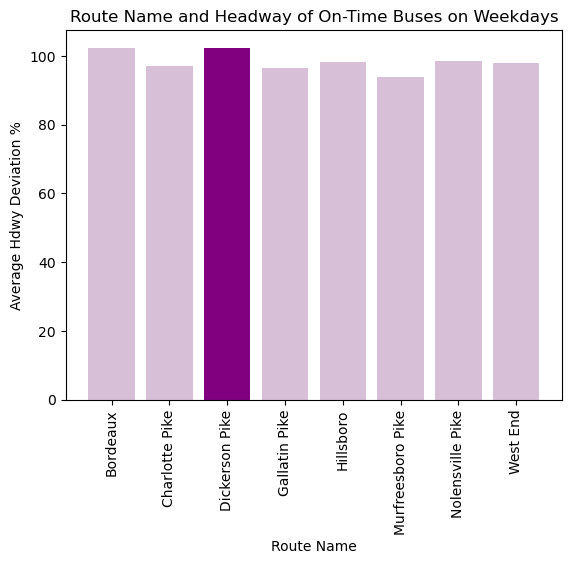

In [83]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')
color_for_avg_hdwy_per_route_name_on_time_wkdy = ('thistle', 'thistle', 'purple', 'thistle', 'thistle', 'thistle', 'thistle', 'thistle')

plt.bar(avg_hdwy_per_route_name_on_time_wkdy['ROUTE_NAME'],
        avg_hdwy_per_route_name_on_time_wkdy['HDWY_DEVIATION_PERC'], 
        color = color_for_avg_hdwy_per_route_name_on_time_wkdy)
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Weekdays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for WEEKDAY    blueviolet

In [84]:
on_time_saturday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Saturday')
]
    
on_time_saturday 

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
25847,Saturday,Bordeaux,99581536,2023-08-05,MHSP,2023-08-05 05:42:00,2023-08-05 05:32:56,2023-08-05 05:42:13,57.0,56.516666,1,-0.216666,99.152046
25851,Saturday,Bordeaux,99581540,2023-08-05,MCC5_10,2023-08-05 06:15:00,2023-08-05 05:58:18,2023-08-05 06:16:22,60.0,60.866666,1,-1.366666,101.444443
25856,Saturday,Bordeaux,99581545,2023-08-05,CV23,2023-08-05 06:54:00,2023-08-05 06:58:08,2023-08-05 06:58:08,30.0,34.550000,1,-4.133333,115.166667
25858,Saturday,Bordeaux,99581547,2023-08-05,MCC5_10,2023-08-05 07:15:00,2023-08-05 07:05:54,2023-08-05 07:15:30,30.0,27.550000,1,-0.500000,91.833333
25864,Saturday,Bordeaux,99581553,2023-08-05,MCC5_10,2023-08-05 08:15:00,2023-08-05 08:09:46,2023-08-05 08:18:04,30.0,28.383333,1,-3.066666,94.611110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,Saturday,Hillsboro,100406600,2023-09-30,MCC5_9,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,30.0,31.200000,1,-3.283333,104.000000
350315,Saturday,Hillsboro,100406601,2023-09-30,21BK,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,28.0,30.316666,1,-3.333333,108.273807
350317,Saturday,Hillsboro,100406603,2023-09-30,HBHS,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,28.0,26.066666,1,-0.850000,93.095236
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1,-5.900000,122.388887


In [85]:
shortened_df_on_time_saturday = on_time_saturday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_saturday

,ROUTE_NAME,HDWY_DEVIATION_PERC
25847,Bordeaux,99.152046
25851,Bordeaux,101.444443
25856,Bordeaux,115.166667
25858,Bordeaux,91.833333
25864,Bordeaux,94.611110
...,...,...
350314,Hillsboro,104.000000
350315,Hillsboro,108.273807
350317,Hillsboro,93.095236
350320,Hillsboro,122.388887


In [86]:
avg_hdwy_per_route_name_on_time_saturday = shortened_df_on_time_saturday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_saturday

avg_hdwy_per_route_name_on_time_saturday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'}).sort_values('HDWY_DEVIATION_PERC', ascending = False)

,ROUTE_NAME,HDWY_DEVIATION_PERC
2,Dickerson Pike,100.688602
0,Bordeaux,100.497925
6,Nolensville Pike,98.825362
4,Hillsboro,98.636447
7,West End,97.815947
1,Charlotte Pike,97.481962
3,Gallatin Pike,94.198640
5,Murfreesboro Pike,93.368229


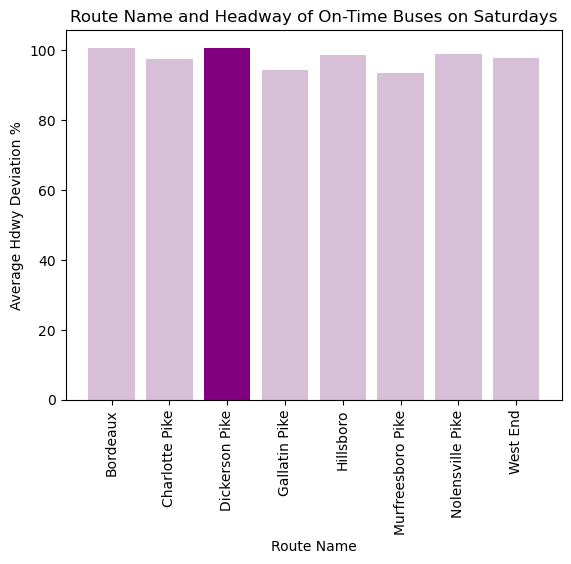

In [87]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')
color_for_avg_hdwy_per_route_name_on_time_saturday = ('thistle', 'thistle', 'purple', 'thistle', 'thistle', 'thistle', 'thistle', 'thistle')

plt.bar(avg_hdwy_per_route_name_on_time_saturday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_saturday['HDWY_DEVIATION_PERC'], 
        color = color_for_avg_hdwy_per_route_name_on_time_saturday)
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Saturdays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for SATURDAY

In [88]:
on_time_sunday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Sunday')
]
on_time_sunday   # these are all the on-time buses on a SUNDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
30011,Sunday,Bordeaux,99601440,2023-08-06,MHSP,2023-08-06 06:47:00,2023-08-06 06:34:12,2023-08-06 06:48:06,30.0,28.866666,1,-1.100000,96.222220
30012,Sunday,Bordeaux,99601441,2023-08-06,CV23,2023-08-06 06:56:00,2023-08-06 06:59:40,2023-08-06 06:59:40,30.0,32.450000,1,-3.666666,108.166667
30014,Sunday,Bordeaux,99601443,2023-08-06,MCC5_10,2023-08-06 07:15:00,2023-08-06 07:06:13,2023-08-06 07:20:42,30.0,33.900000,1,-5.700000,113.000000
30015,Sunday,Bordeaux,99601444,2023-08-06,CV23,2023-08-06 07:26:00,2023-08-06 07:27:37,2023-08-06 07:27:37,30.0,30.000000,1,-1.616666,100.000000
30020,Sunday,Bordeaux,99601449,2023-08-06,CV23,2023-08-06 07:55:00,2023-08-06 07:51:12,2023-08-06 07:55:03,29.0,29.233333,1,-0.050000,100.804597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313639,Sunday,Hillsboro,100220731,2023-09-24,MCC5_9,2023-09-24 20:45:00,2023-09-24 20:37:22,2023-09-24 20:48:40,30.0,30.583333,1,-3.666666,101.944443
313640,Sunday,Hillsboro,100220732,2023-09-24,21BK,2023-09-24 20:59:00,2023-09-24 21:01:35,2023-09-24 21:01:35,28.0,26.766666,1,-2.583333,95.595236
313642,Sunday,Hillsboro,100220734,2023-09-24,HBHS,2023-09-24 21:16:00,2023-09-24 21:11:18,2023-09-24 21:20:40,28.0,31.900000,1,-4.666666,113.928571
313645,Sunday,Hillsboro,100220737,2023-09-24,MCC5_9,2023-09-24 21:45:00,2023-09-24 21:43:17,2023-09-24 21:48:39,30.0,32.050000,1,-3.650000,106.833333


In [89]:
shortened_df_on_time_sunday = on_time_sunday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]
shortened_df_on_time_sunday

,ROUTE_NAME,HDWY_DEVIATION_PERC
30011,Bordeaux,96.222220
30012,Bordeaux,108.166667
30014,Bordeaux,113.000000
30015,Bordeaux,100.000000
30020,Bordeaux,100.804597
...,...,...
313639,Hillsboro,101.944443
313640,Hillsboro,95.595236
313642,Hillsboro,113.928571
313645,Hillsboro,106.833333


In [90]:
avg_hdwy_per_route_name_on_time_sunday = shortened_df_on_time_sunday.groupby('ROUTE_NAME')['HDWY_DEVIATION_PERC'].mean().reset_index()
avg_hdwy_per_route_name_on_time_sunday

avg_hdwy_per_route_name_on_time_sunday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'}).sort_values('HDWY_DEVIATION_PERC', ascending = False)

,ROUTE_NAME,HDWY_DEVIATION_PERC
2,Dickerson Pike,117.504424
7,West End,102.580410
0,Bordeaux,100.885870
4,Hillsboro,99.541117
6,Nolensville Pike,99.396302
3,Gallatin Pike,98.515421
1,Charlotte Pike,98.299726
5,Murfreesboro Pike,94.033413


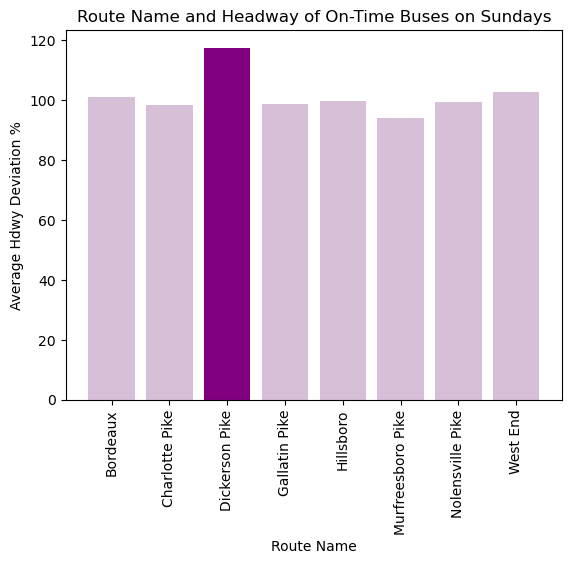

In [91]:
# color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# color = ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')
color_for_avg_hdwy_per_route_name_on_time_sunday = ('thistle', 'thistle', 'purple', 'thistle', 'thistle', 'thistle', 'thistle', 'thistle')

plt.bar(avg_hdwy_per_route_name_on_time_sunday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_sunday['HDWY_DEVIATION_PERC'],
        color = color_for_avg_hdwy_per_route_name_on_time_sunday)
plt.xticks(rotation = 90)
plt.title('Route Name and Headway of On-Time Buses on Sundays')
plt.xlabel("Route Name")
plt.ylabel("Average Hdwy Deviation %")
plt.show()

# this chart shows the average headway per route name for SATURDAY

In [92]:
# weekday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Weekday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE' : 'mean'}))
# weekday_avg_headway_adherence

In [93]:
# Saturday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Saturday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE' : 'mean'}))
# Saturday_avg_headway_adherence

In [94]:
# Sunday_avg_headway_adherence = pd.DataFrame(filtered_cols_for_q_3[
#     filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Sunday'].agg({'ACTUAL_HDWY' : 'mean', 'ADHERENCE': 'mean'}))
# Sunday_avg_headway_adherence

In [95]:
day_of_week_on_time_buses = filtered_cols_for_q_3[filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1]
day_of_week_on_time_buses

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1,-1.916666,105.619046
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1,-0.183333,96.777773
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,Saturday,Hillsboro,100406600,2023-09-30,MCC5_9,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,30.0,31.200000,1,-3.283333,104.000000
350315,Saturday,Hillsboro,100406601,2023-09-30,21BK,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,28.0,30.316666,1,-3.333333,108.273807
350317,Saturday,Hillsboro,100406603,2023-09-30,HBHS,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,28.0,26.066666,1,-0.850000,93.095236
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1,-5.900000,122.388887


In [96]:
dict_for_route_names = {'HDWY_DEVIATION_PERC' : 'mean'}

all_routes_avg_hdwy_adherence = pd.DataFrame(day_of_week_on_time_buses.groupby(['ROUTE_NAME', 'DAY_OF_WEEK']).aggregate(dict_for_route_names)).reset_index().rename(
    columns = {'ROUTE_NAME' : 'Route Name', 'DAY_OF_WEEK' : 'Day of the Week', 'HDWY_DEVIATION_PERC' : 'Avg Hdwy Deviation Percentage'})

all_routes_avg_hdwy_adherence

,Route Name,Day of the Week,Avg Hdwy Deviation Percentage
0,Bordeaux,Saturday,100.497925
1,Bordeaux,Sunday,100.885870
2,Bordeaux,Weekday,102.182005
3,Charlotte Pike,Saturday,97.481962
4,Charlotte Pike,Sunday,98.299726
5,Charlotte Pike,Weekday,97.134998
6,Dickerson Pike,Saturday,100.688602
7,Dickerson Pike,Sunday,117.504424
8,Dickerson Pike,Weekday,102.386359
9,Gallatin Pike,Saturday,94.198640


In [97]:
route_names_needed = day_of_week_on_time_buses['ROUTE_NAME'].sort_values().unique().tolist()
route_names_needed

['Bordeaux',
 'Charlotte Pike',
 'Dickerson Pike',
 'Gallatin Pike',
 'Hillsboro',
 'Murfreesboro Pike',
 'Nolensville Pike',
 'West End']

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

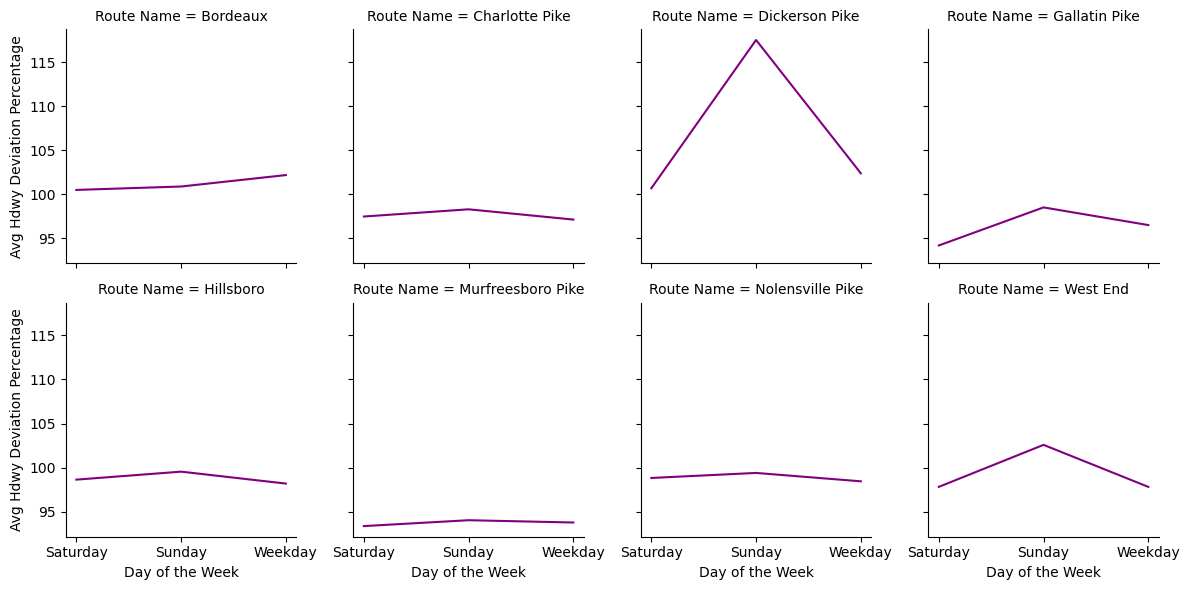

In [98]:
g = sns.FacetGrid(data = all_routes_avg_hdwy_adherence[all_routes_avg_hdwy_adherence['Route Name'].isin(route_names_needed)],
                  col = 'Route Name', col_wrap = 4)
g.map(sns.lineplot, 'Day of the Week', 'Avg Hdwy Deviation Percentage',  color = 'purple');

C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Barbie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Deviation of On Time Buses')

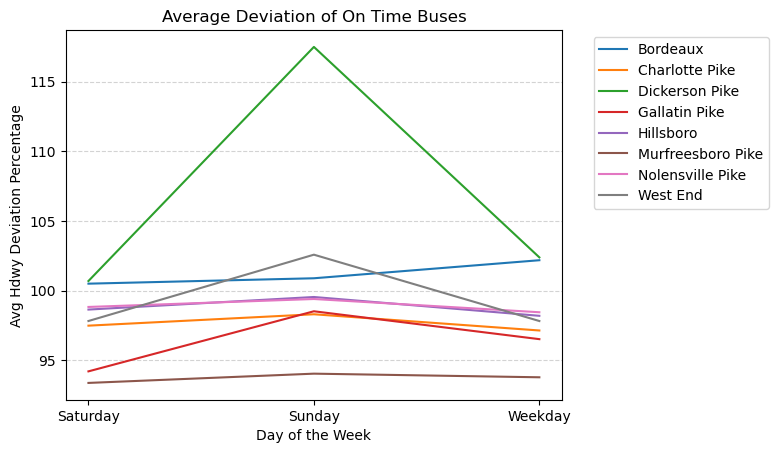

In [99]:
sns.lineplot(x = 'Day of the Week', y = 'Avg Hdwy Deviation Percentage', data = all_routes_avg_hdwy_adherence, hue = 'Route Name')
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--')
# plt.plot([0, 0], [100, 100], linewidth = 2, linestyle = 'dotted', color = 'black')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.title('Average Deviation of On Time Buses')


# # plt.savefig('plot1.png')

# ## setting borders and labels white
# fig.spines['bottom'].set_color('white')
# fig.spines['top'].set_color('white')
# fig.xaxis.label.set_color('white')
# fig.tick_params(axis='x', colors='white')
# fig.yaxis.label.set_color('white')
# fig.tick_params(axis='y', colors='white')
# fig.title.set_color('white')

# # ### saving and making background transparent
# # plt.savefig('Time_of_Day.png', transparent = True)

In [100]:
day_of_week_on_time_buses

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT,ADHERENCE,HDWY_DEVIATION_PERC
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1,-1.716666,107.619046
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1,-1.916666,105.619046
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1,-0.183333,96.777773
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1,-1.316666,85.555553
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1,-1.516666,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,Saturday,Hillsboro,100406600,2023-09-30,MCC5_9,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,30.0,31.200000,1,-3.283333,104.000000
350315,Saturday,Hillsboro,100406601,2023-09-30,21BK,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,28.0,30.316666,1,-3.333333,108.273807
350317,Saturday,Hillsboro,100406603,2023-09-30,HBHS,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,28.0,26.066666,1,-0.850000,93.095236
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1,-5.900000,122.388887


In [101]:
avg_hdwy_perc_day_of_week = day_of_week_on_time_buses.groupby('DAY_OF_WEEK').agg({'HDWY_DEVIATION_PERC' : 'mean'}).reset_index().rename(
    columns = {'DAY_OF_WEEK' : 'Day of the Week', 'HDWY_DEVIATION_PERC' : 'Avg Hdwy Deviation %'}).sort_values('Avg Hdwy Deviation %', ascending = False)
avg_hdwy_perc_day_of_week

,Day of the Week,Avg Hdwy Deviation %
1,Sunday,100.662296
2,Weekday,97.782258
0,Saturday,97.010493


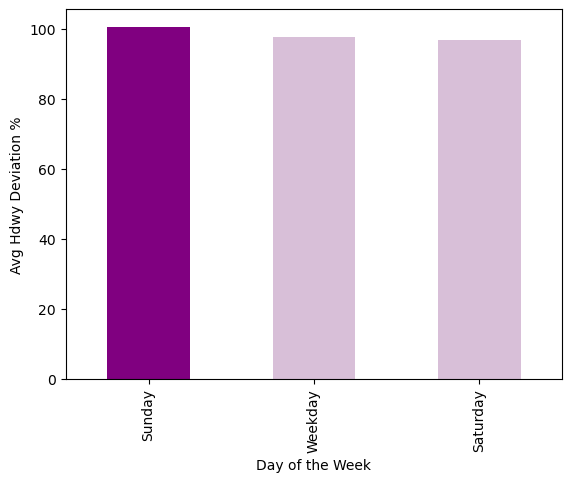

In [102]:
# colors_for_avg_hdwy_perc_day_of_week = ('thistle', 'purple', 'thistle')
#  ('thistle', 'thistle', 'purple', 'thistle', 'thistle', 'thistle', 'thistle', 'thistle')


avg_hdwy_perc_day_of_week.plot(x = 'Day of the Week', y = 'Avg Hdwy Deviation %', 
                               kind = 'bar', color = ['purple', 'thistle', 'thistle'])
plt.ylabel('Avg Hdwy Deviation %')
plt.gca().get_legend().remove()
# plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
# plt.grid(axis = 'x', color = 'lightgray', linestyle = '--')

In [103]:
# all_routes_on_time_business_hdwy_dev.plot(x = 'DAY_OF_WEEK', y = 'HDWY_DEVIATION_PERC')

In [104]:
func_dictionary_1 = {'ADHERENCE' : 'mean', 'HDWY_DEVIATION_PERC' : 'mean'}

avg_headway_day_of_week = pd.DataFrame(day_of_week_on_time_buses.groupby('DAY_OF_WEEK').aggregate(func_dictionary_1)).reset_index().rename(
    columns = {'DAY_OF_WEEK' : 'Day of the Week', 'ADHERENCE' : 'Average Adherence',
               'HDWY_DEVIATION_PERC' : 'Average Headway Deviation %'})

avg_headway_day_of_week

,Day of the Week,Average Adherence,Average Headway Deviation %
0,Saturday,-2.098221,97.010493
1,Sunday,-1.851674,100.662296
2,Weekday,-1.989527,97.782258


In [105]:
# WEEKDAY
# Avg Headway Dev... 16.25 mins in between buses on avg
# Avg Adherence... 1.98 mins late on avg
# Avg Hdwy Dev... 97.78%

# SATURDAY
# Avg Headway Dev... 24.34 in between buses on avg
# Avg Adherence... 2.09 mins late on avg
# Avg Hdwy Dev... 97.01%

#SUNDAY
# Avg Headway Dev... 25.52 in between buses on avg
# Avg Adherence... 1.85 mins late on avg
# Avg Hdwy Dev... 100.66%

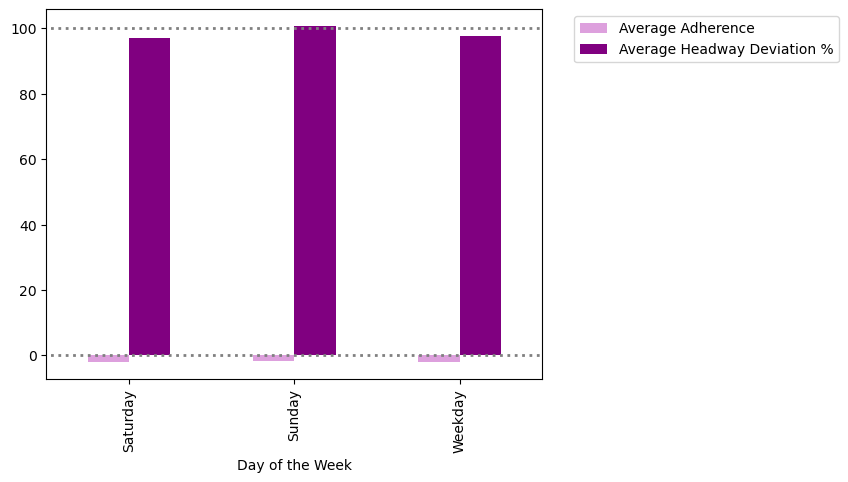

In [106]:
colors2 = ('plum', 'purple')

avg_headway_day_of_week.plot(x = 'Day of the Week', y = ['Average Adherence', 'Average Headway Deviation %'], 
                             kind = 'bar', color = colors2)
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.plot([-5, 8], [100, 100], linewidth = 2, linestyle = 'dotted', color = 'gray')
plt.plot([-5, 8], [0, 0], linewidth = 2, linestyle = 'dotted', color = 'gray')
# plt.axhline(0, 80)
# plt.axvline(1)
# plt.grid(axis = 'y', color = 'lightgray', linestyle = '--')
plt.show()

# 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [107]:
wego_trimmed.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107


In [108]:
wego_trimmed['OPERATOR'].nunique()

333

In [109]:
wego_trimmed['OPERATOR'].sort_values().unique().tolist()

[56,
 235,
 244,
 301,
 304,
 326,
 329,
 332,
 341,
 357,
 359,
 375,
 379,
 409,
 414,
 465,
 471,
 517,
 520,
 522,
 559,
 572,
 611,
 624,
 653,
 659,
 723,
 778,
 785,
 907,
 1016,
 1040,
 1052,
 1078,
 1133,
 1147,
 1170,
 1175,
 1177,
 1190,
 1198,
 1202,
 1204,
 1206,
 1208,
 1222,
 1237,
 1251,
 1266,
 1277,
 1305,
 1330,
 1343,
 1352,
 1359,
 1361,
 1362,
 1363,
 1368,
 1372,
 1379,
 1389,
 1391,
 1394,
 1401,
 1406,
 1410,
 1419,
 1457,
 1489,
 1500,
 1505,
 1524,
 1542,
 1566,
 1582,
 1590,
 1593,
 1596,
 1597,
 1598,
 1601,
 1603,
 1606,
 1617,
 1619,
 1621,
 1623,
 1650,
 1673,
 1682,
 1703,
 1705,
 1706,
 1713,
 1716,
 1717,
 1730,
 1736,
 1742,
 1743,
 1761,
 1762,
 1763,
 1780,
 1782,
 1788,
 1792,
 1797,
 1800,
 1814,
 1815,
 1823,
 1824,
 1838,
 1842,
 1845,
 1848,
 1865,
 1866,
 1867,
 1880,
 1889,
 1892,
 1893,
 1904,
 1914,
 1915,
 1922,
 1927,
 1938,
 1948,
 1958,
 1984,
 1992,
 1997,
 2001,
 2012,
 2029,
 2033,
 2040,
 2041,
 2053,
 2055,
 2059,
 2062,
 2082,
 2

In [110]:
within_good_range_hdwy_dev = on_time_buses[(on_time_buses['HDWY_DEVIATION_PERC'] < 150)
                                          & (on_time_buses['HDWY_DEVIATION_PERC'] > 50)]
within_good_range_hdwy_dev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,108.273807
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887


In [111]:
within_good_range_hdwy_dev.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,1.898970e+05,189897.000000,1.898970e+05,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.000000,189897.0,189897.0,189897.0,189897.0,189897.0,189897.000000,189897.000000,43975.000000,189897.000000
mean,1.202309e+08,1.320421,1.001051e+08,38.633291,3871.057937,1917.093224,351592.483925,0.002059,7.498960,0.275865,36.158828,-86.772113,-1.990705,18.670369,18.334664,-0.335705,0.0,0.0,1.0,0.0,0.0,0.014218,4.217570,12.933076,98.339114
std,5.053136e+01,0.653802,3.228348e+05,20.167703,2016.220282,771.967896,1491.287116,0.053336,4.041801,0.446950,0.057797,0.065407,1.727702,12.065474,12.289183,2.834091,0.0,0.0,0.0,0.0,0.0,0.118390,7.601189,6.543010,17.923906
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,56.000000,345106.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-6.000000,5.000000,2.533333,-24.616667,0.0,0.0,1.0,0.0,0.0,0.000000,-4.116666,0.000000,50.083330
25%,1.202308e+08,1.000000,9.986398e+07,22.000000,2300.000000,1372.000000,350907.000000,0.000000,4.000000,0.000000,36.127172,-86.814445,-3.233333,11.000000,11.500000,-1.966667,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,10.000000,88.333330
50%,1.202308e+08,1.000000,1.001350e+08,50.000000,5004.000000,1958.000000,351935.000000,0.000000,6.000000,0.000000,36.152077,-86.774320,-1.766666,15.000000,15.916666,-0.150000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,10.000000,99.210526
75%,1.202309e+08,1.000000,1.003480e+08,55.000000,5505.000000,2567.000000,352663.000000,0.000000,10.000000,1.000000,36.181248,-86.726914,-0.600000,20.000000,22.283333,1.516666,0.0,0.0,1.0,0.0,0.0,0.000000,5.366666,16.000000,108.833330
max,1.202309e+08,3.000000,1.007010e+08,56.000000,9950.000000,3173.000000,354098.000000,4.000000,17.000000,1.000000,36.307973,-86.636496,1.000000,503.000000,509.333333,75.666666,0.0,0.0,1.0,0.0,0.0,1.000000,262.900000,118.000000,149.916665


In [112]:
below_50_perc_dev = late_buses[late_buses['HDWY_DEVIATION_PERC'] < 50]
below_50_perc_dev

above_150_perc_dev = late_buses[late_buses['HDWY_DEVIATION_PERC'] > 150]
above_150_perc_dev

combined_out_of_range_hdwy_dev = pd.concat([below_50_perc_dev, above_150_perc_dev])
combined_out_of_range_hdwy_dev

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
1358,120230801,1,99459711,2023-08-01,3,300,1992,346067,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-08-01 17:10:00,2023-08-01 17:34:46,2023-08-01 17:34:46,-24.766666,10.0,0.150000,-9.850000,0,1,0,0,0.0,0,0.000000,NaN,West End,Weekday,1.500000
1359,120230801,1,99459712,2023-08-01,3,300,1992,346067,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-08-01 17:14:00,2023-08-01 17:38:53,2023-08-01 17:38:53,-24.883333,10.0,0.250000,-9.750000,0,1,0,0,0.0,0,0.000000,NaN,West End,Weekday,2.500000
1360,120230801,1,99459713,2023-08-01,3,300,1992,346067,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-08-01 17:24:00,2023-08-01 17:46:05,2023-08-01 17:46:05,-22.083333,10.0,0.300000,-9.700000,0,1,0,0,0.0,0,0.000000,NaN,West End,Weekday,3.000000
1582,120230801,1,99459941,2023-08-01,3,303,326,346215,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-08-01 15:04:00,2023-08-01 15:22:59,2023-08-01 15:22:59,-18.983333,15.0,0.216666,-14.783334,0,1,0,0,0.0,0,0.000000,NaN,West End,Weekday,1.444440
1583,120230801,1,99459942,2023-08-01,3,303,326,346215,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-08-01 15:12:00,2023-08-01 15:31:58,2023-08-01 15:31:58,-19.966666,15.0,0.766666,-14.233334,0,1,0,0,0.0,0,0.000000,NaN,West End,Weekday,5.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349921,120230930,2,100405997,2023-09-30,56,5603,2424,352915,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-09-30 18:55:00,2023-09-30 19:08:42,2023-09-30 19:08:42,-13.700000,20.0,33.650000,13.650000,0,1,0,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,168.250000
349924,120230930,2,100406000,2023-09-30,56,5603,2424,352916,0,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,-86.750111,2023-09-30 19:24:00,2023-09-30 19:33:56,2023-09-30 19:33:56,-9.933333,20.0,30.083333,10.083333,0,1,0,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,150.416665
349928,120230930,2,100406004,2023-09-30,56,5603,2424,352916,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 19:57:00,2023-09-30 20:04:57,2023-09-30 20:07:23,-10.383333,19.0,29.950000,10.950000,0,1,0,0,0.0,0,2.433333,NaN,Gallatin Pike,Saturday,157.631579
350051,120230930,2,100406131,2023-09-30,56,5605,520,353007,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 09:57:00,2023-09-30 10:07:35,2023-09-30 10:07:35,-10.583333,20.0,30.050000,10.050000,0,1,0,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday,150.250000


In [113]:
top_10_on_time_drivers = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)
top_10_on_time_drivers

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
5,409,1614
6,1410,1579
7,2424,1524
8,2399,1494
9,1368,1474


In [114]:
# top_10_on_time_drivers.describe()   # 55 to 198 range  - filter out anything below 55 trips

In [115]:
bottom_10_late_drivers = combined_out_of_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)
bottom_10_late_drivers

,Operator,Total Routes
0,2109,425
1,1352,385
2,1650,323
3,1800,297
4,1359,285
5,3096,279
6,2082,274
7,2356,269
8,3101,238
9,357,236


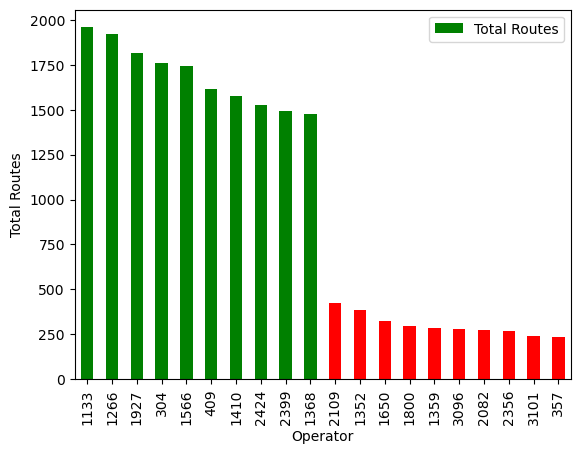

In [116]:
filtered_driver_df = pd.concat([top_10_on_time_drivers, bottom_10_late_drivers])
filtered_driver_df

colors2 = ('green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green',
           
           'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red')

# filtered_driver_df.sort_values(by = ['Total Routes'], inplace = True)
# filtered_driver_df.reset_index(drop = True, inplace = True)

filtered_driver_df.plot(x = 'Operator', y = 'Total Routes', kind = 'bar', color = colors2)
plt.xticks(rotation=90) 
plt.xlabel("Operator")
plt.ylabel("Total Routes")
plt.show()

In [117]:
# top_10_on_time2 = within_good_range_hdwy_dev.value_counts().head(10).reset_index()

top_10_on_time2 = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
    columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'}).head(10)

# bottom_10_on_time2 = within_good_range_hdwy_dev.tail(10)

In [118]:
top_10_on_time2

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
5,409,1614
6,1410,1579
7,2424,1524
8,2399,1494
9,1368,1474


In [119]:
all_operators_total_routes = within_good_range_hdwy_dev['OPERATOR'].value_counts().reset_index().rename(
     columns= {'OPERATOR' : 'Operator', 'count' : 'Total Routes'})

In [120]:
all_operators_total_routes    # try to combine with calendar id and trip id

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
...,...,...
327,2377,6
328,375,6
329,235,3
330,2256,2


In [121]:
filtered_top_bottom_on_time_operators = all_operators_total_routes[all_operators_total_routes['Total Routes'] > 55]
filtered_top_bottom_on_time_operators   # 55 to 198 range

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
...,...,...
279,3035,76
280,653,70
281,2662,67
282,1198,62


In [122]:
filtered_top_10_on_time = filtered_top_bottom_on_time_operators.head(10)
filtered_top_10_on_time

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
5,409,1614
6,1410,1579
7,2424,1524
8,2399,1494
9,1368,1474


In [123]:
filterd_bottom_10_on_time = filtered_top_bottom_on_time_operators.tail(10)
filterd_bottom_10_on_time

,Operator,Total Routes
274,2546,88
275,1621,88
276,2693,84
277,2178,77
278,2432,76
279,3035,76
280,653,70
281,2662,67
282,1198,62
283,2779,58


In [124]:
only_on_time_top10_bottom10 = pd.concat([filtered_top_10_on_time, filterd_bottom_10_on_time])
only_on_time_top10_bottom10

,Operator,Total Routes
0,1133,1959
1,1266,1920
2,1927,1816
3,304,1758
4,1566,1743
5,409,1614
6,1410,1579
7,2424,1524
8,2399,1494
9,1368,1474


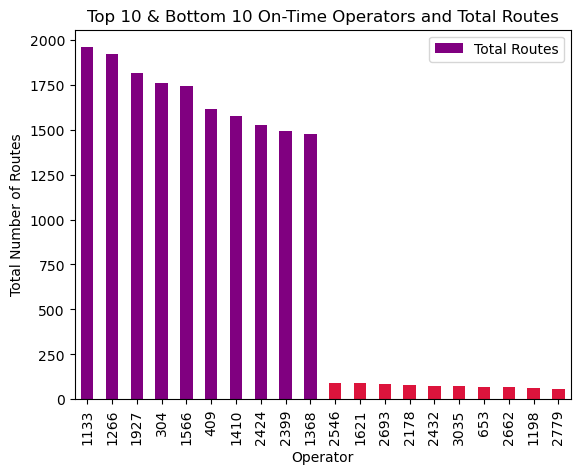

In [125]:
colors_for_only_on_time_top10_bottom10 = ('purple', 'purple','purple','purple','purple','purple','purple','purple','purple',
                                         'purple', 'crimson', 'crimson',  'crimson', 'crimson', 'crimson', 'crimson',
                                          'crimson', 'crimson', 'crimson', 'crimson',)

# fig, ax = 

only_on_time_top10_bottom10.plot(x = 'Operator', y = 'Total Routes', 
                                 kind = 'bar', color = colors_for_only_on_time_top10_bottom10)
plt.title('Top 10 & Bottom 10 On-Time Operators and Total Routes')
plt.ylabel('Total Number of Routes')
plt.show()

In [126]:
wego_trimmed['CALENDAR_TRIP_ID'] = wego_trimmed['TRIP_ID'].astype(str) + wego_trimmed['CALENDAR_ID'].astype(str)
wego_trimmed
grouped_operator = wego_trimmed.groupby('OPERATOR').agg(unique_trips = ('CALENDAR_TRIP_ID', 'count')).reset_index()
grouped_operator.sort_values('unique_trips', ascending = False) #.tail(60)

grouped_operator = grouped_operator[grouped_operator['unique_trips'] > 60]
grouped_operator

,OPERATOR,unique_trips
4,304,2016
5,326,1645
6,329,1703
7,332,1993
8,341,863
...,...,...
324,3138,228
325,3140,682
326,3142,451
327,3144,503


In [127]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC,CALENDAR_TRIP_ID
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046,345106120230801
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046,345106120230801
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773,345106120230801
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553,345107120230801
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107,345107120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887,353447120230930
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887,353448120230930
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553,353448120230930
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,106.222220,353449120230930


In [128]:
wego_trimmed[wego_trimmed['SCHEDULED_HDWY'] >= 5].value_counts('OPERATOR', ascending = False).reset_index()

,OPERATOR,count
0,1266,2345
1,1133,2156
2,304,2016
3,2399,2005
4,332,1993
...,...,...
328,2313,8
329,235,7
330,2377,6
331,2256,4


In [129]:
grouped_operator.describe()

,OPERATOR,unique_trips
count,288.000000,288.000000
mean,2092.781250,903.652778
std,745.238187,513.555283
min,304.000000,64.000000
25%,1602.500000,502.750000
50%,2189.000000,851.500000
75%,2670.500000,1276.250000
max,3156.000000,2345.000000


In [130]:
top_10_grouped_trimmed = grouped_operator.sort_values('unique_trips', ascending = False).head(10)
top_10_grouped_trimmed

,OPERATOR,unique_trips
48,1266,2345
34,1133,2156
4,304,2016
194,2399,2005
7,332,1993
262,2760,1935
129,1927,1935
185,2352,1932
88,1650,1912
196,2424,1888


In [131]:
bottom_10_grouped = grouped_operator.sort_values('unique_trips', ascending = False).tail(10)
bottom_10_grouped

,OPERATOR,unique_trips
86,1621,107
299,3035,102
266,2779,94
248,2662,91
30,1016,90
162,2178,84
128,1922,83
40,1198,81
313,3103,79
170,2253,64


In [132]:
top_10_bottom_10_grouped = pd.concat([top_10_grouped_trimmed, bottom_10_grouped])
top_10_bottom_10_grouped

,OPERATOR,unique_trips
48,1266,2345
34,1133,2156
4,304,2016
194,2399,2005
7,332,1993
262,2760,1935
129,1927,1935
185,2352,1932
88,1650,1912
196,2424,1888


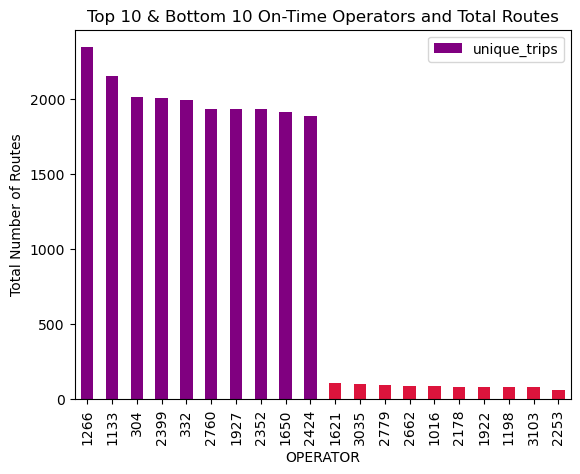

In [133]:
colors_for_top_10_bottom_10_grouped = ('purple', 'purple','purple','purple','purple','purple','purple','purple','purple',
                                         'purple', 'crimson', 'crimson',  'crimson', 'crimson', 'crimson', 'crimson',
                                          'crimson', 'crimson', 'crimson', 'crimson',)

top_10_bottom_10_grouped.plot(x = 'OPERATOR', y = 'unique_trips', 
                                 kind = 'bar', color = colors_for_top_10_bottom_10_grouped)
plt.title('Top 10 & Bottom 10 On-Time Operators and Total Routes')
plt.ylabel('Total Number of Routes')
plt.show()

# 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [134]:
# lateness = 6 mins late (-6)

In [135]:
late_buses.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC
78,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.0,NaN,Bordeaux,Weekday,139.027775
83,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-08-01 18:06:00,2023-08-01 18:13:16,2023-08-01 18:13:16,-7.266666,49.0,45.016666,-3.983334,0,1,0,0,0.0,0,0.0,NaN,Bordeaux,Weekday,91.870747
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.0,19.0,Bordeaux,Weekday,108.333332
92,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.0,NaN,Bordeaux,Weekday,123.266664
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.9,15.0,Bordeaux,Weekday,124.388887


In [136]:
late_buses['HDWY_DEVIATION_PERC'].agg('mean')  # average Dev Perc for late buses

128.51487707298426

# 6. How much impact does being late or too spaced out at the first stop have downstream? (if we start out late, does it get worse/better/same? any pattern as we move along a route?)

In [137]:
first_stop_trips = wego_trimmed[wego_trimmed['TRIP_EDGE'] == 1]
first_stop_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC,CALENDAR_TRIP_ID
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046,345106120230801
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553,345107120230801
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday,99.666667,345108120230801
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday,101.555553,345109120230801
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 07:45:00,2023-08-01 07:34:00,2023-08-01 07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0,Bordeaux,Weekday,99.576719,345110120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday,104.000000,353445120230930
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday,93.095236,353446120230930
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887,353447120230930
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887,353448120230930


In [138]:
first_stop_LATE = wego_trimmed[wego_trimmed['ADJUSTED_LATE_COUNT'] == 1]
first_stop_LATE

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC,CALENDAR_TRIP_ID
78,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,139.027775,345127120230801
83,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-08-01 18:06:00,2023-08-01 18:13:16,2023-08-01 18:13:16,-7.266666,49.0,45.016666,-3.983334,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,91.870747,345128120230801
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,Bordeaux,Weekday,108.333332,345131120230801
92,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,123.266664,345131120230801
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,Bordeaux,Weekday,124.388887,345132120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,120230930,2,100406598,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 20:18:00,2023-09-30 20:24:13,2023-09-30 20:24:13,-6.216666,30.0,35.516666,5.516666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,118.388887,353444120230930
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,112.738093,353446120230930
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887,353448120230930
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553,353448120230930


In [139]:
first_stop_LATE['TRIP_ID'].nunique()  # 1529 buses that were late to their first stop 

2809

In [140]:
trip_ids_late_on_first_trip = first_stop_LATE['TRIP_ID'].sort_values().unique().tolist()  
trip_ids_late_on_first_trip

# gives us all trip ids that were LATE on first trip of the day

[345127,
 345128,
 345129,
 345131,
 345132,
 345133,
 345134,
 345135,
 345138,
 345219,
 345230,
 345234,
 345301,
 345305,
 345307,
 345309,
 345310,
 345311,
 345312,
 345313,
 345315,
 345395,
 345427,
 345436,
 345438,
 345440,
 345442,
 345443,
 345445,
 345455,
 345468,
 345472,
 345487,
 345490,
 345491,
 345493,
 345494,
 345495,
 345509,
 345512,
 345513,
 345514,
 345516,
 345517,
 345519,
 345524,
 345579,
 345581,
 345585,
 345589,
 345593,
 345655,
 345656,
 345658,
 345660,
 345666,
 345668,
 345669,
 345726,
 345728,
 345730,
 345732,
 345733,
 345734,
 345735,
 345736,
 345737,
 345738,
 345739,
 345740,
 346051,
 346053,
 346055,
 346058,
 346060,
 346061,
 346063,
 346064,
 346065,
 346067,
 346069,
 346070,
 346071,
 346073,
 346075,
 346076,
 346141,
 346143,
 346145,
 346147,
 346149,
 346151,
 346153,
 346155,
 346201,
 346203,
 346205,
 346206,
 346207,
 346208,
 346209,
 346210,
 346211,
 346212,
 346213,
 346214,
 346215,
 346217,
 346218,
 346219,
 346220,
 

In [141]:
all_late_buses_on_first_trip_of_day = wego_trimmed[wego_trimmed['TRIP_ID'].isin(trip_ids_late_on_first_trip)].reset_index()
all_late_buses_on_first_trip_of_day

# these are ALL the buses that were LATE on the first trip.

,index,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC,CALENDAR_TRIP_ID
0,77,120230801,1,99457967,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 17:05:00,2023-08-01 16:54:18,2023-08-01 17:08:21,-3.350000,50.0,52.450000,2.450000,0,0,1,0,0.0,0,14.050000,15.0,Bordeaux,Weekday,104.900000,345127120230801
1,78,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,139.027775,345127120230801
2,80,120230801,1,99457970,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 17:40:00,2023-08-01 17:30:23,2023-08-01 17:42:42,-2.700000,12.0,15.650000,3.650000,0,0,1,0,0.0,0,12.316666,10.0,Bordeaux,Weekday,130.416667,345128120230801
3,81,120230801,1,99457971,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 17:52:00,2023-08-01 17:56:54,2023-08-01 17:56:54,-4.900000,12.0,17.866666,5.866666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,148.888883,345128120230801
4,82,120230801,1,99457972,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-08-01 17:56:00,2023-08-01 18:00:06,2023-08-01 18:00:06,-4.100000,49.0,44.633333,-4.366667,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,91.088435,345128120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233611,350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887,353447120230930
233612,350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887,353448120230930
233613,350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553,353448120230930
233614,350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,106.222220,353449120230930


In [142]:
all_late_buses_on_first_trip_of_day['TRIP_ID'].nunique() # just making sure we still have the right trip id's

2809

In [143]:
all_late_buses_on_first_trip_of_day.describe()

,index,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEVIATION_PERC
count,233616.000000,2.336160e+05,233616.000000,2.336160e+05,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.000000,233616.0,233616.0,233616.000000,233614.000000,45172.000000,233616.000000
mean,179323.617316,1.202309e+08,1.255787,1.001198e+08,40.110772,4019.407682,1957.174714,351820.550335,0.003720,7.460474,0.232797,36.156638,-86.765052,-3.652341,17.541286,18.098335,0.557049,0.030991,0.190291,0.778718,0.0,0.0,0.014477,3.465956,12.720867,103.073529
std,98881.862847,5.028853e+01,0.587556,3.118890e+05,20.223224,2021.589626,774.132731,1251.779272,0.072731,3.853193,0.422615,0.059073,0.065869,4.791487,11.770644,13.855721,6.770275,0.173294,0.392531,0.415111,0.0,0.0,0.119446,6.927629,6.209990,40.887225
min,77.000000,1.202308e+08,1.000000,9.945797e+07,3.000000,300.000000,56.000000,345127.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-59.816666,5.000000,0.000000,-55.533334,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-4.116666,0.000000,0.000000
25%,93791.750000,1.202308e+08,1.000000,9.992500e+07,23.000000,2302.000000,1394.000000,351108.000000,0.000000,4.000000,0.000000,36.125659,-86.804611,-4.966666,10.000000,10.766666,-2.316667,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,85.416667
50%,178499.500000,1.202308e+08,1.000000,1.001397e+08,52.000000,5204.000000,2012.000000,352151.000000,0.000000,7.000000,0.000000,36.149007,-86.762710,-2.416666,15.000000,15.833333,0.133333,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,10.000000,100.750000
75%,264197.500000,1.202309e+08,1.000000,1.003508e+08,55.000000,5507.000000,2594.000000,352697.000000,0.000000,10.000000,0.000000,36.179433,-86.714068,-0.800000,20.000000,22.450000,2.700000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,2.800000,16.000000,117.105263
max,350327.000000,1.202309e+08,3.000000,1.007029e+08,56.000000,9950.000000,3173.000000,354098.000000,4.000000,17.000000,1.000000,36.307973,-86.636496,33.633333,503.000000,558.700000,529.550000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,262.900000,118.000000,2218.200000


# 7. What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer **scheduled** layover time have more stable headway values?  - usually 1 driver on one route, and turn around at the end, if there is a layaway between end of trip and start of next time having anything to do with it? you can look at SCHEDULED layover and go from there.

In [144]:
wego_trimmed

# shortened_df_on_time_sunday = on_time_sunday.loc[:, ['ROUTE_NAME', 'HDWY_DEVIATION_PERC']]  EXAMPLE

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK,HDWY_DEVIATION_PERC,CALENDAR_TRIP_ID
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday,107.619046,345106120230801
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,105.619046,345106120230801
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,96.777773,345106120230801
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday,85.555553,345107120230801
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday,74.111107,345107120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday,122.388887,353447120230930
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday,116.388887,353448120230930
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,117.555553,353448120230930
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday,106.222220,353449120230930


In [145]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [146]:
# wego_trimmed = wego.dropna(subset= ['ADHERENCE','SCHEDULED_HDWY', 'ACTUAL_HDWY' ])
# wego_trimmed = wego_trimmed[wego_trimmed['PREV_SCHED_STOP_CANCELLED'] != 1]
# wego_trimmed = wego_trimmed[wego_trimmed['STOP_CANCELLED'] != 1]
# wego_trimmed = wego_trimmed[wego_trimmed['SCHEDULED_HDWY'] != 0]
# wego_trimmed = wego_trimmed[wego_trimmed['ADHERENCE'] > -60]
# wego_trimmed = wego_trimmed[wego_trimmed['ADHERENCE'] < 60]
# wego_trimmed = wego_trimmed[wego_trimmed['SCHEDULED_HDWY'] >= 5]       # FILTERS FROM THE TOP

In [147]:
wego_trips = wego[(wego['ADHERENCE'] >= -60) & (wego['ADHERENCE'] <= 60)]  # removing Adherence outliers
wego_trips = wego_trips[wego_trips['PREV_SCHED_STOP_CANCELLED'] != 1]  # removing cancelled stops
wego_trips = wego_trips.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY', 'ACTUAL_ARRIVAL_TIME', 'SCHEDULED_LAYOVER_MINUTES']) # dropping NANs for Adherence and Headway 
wego_trips = wego_trips[wego_trips['SCHEDULED_HDWY']!=0] # removing zeros to avoid infs
wego_trips = wego_trips[wego_trips['STOP_CANCELLED']!=1] # removing stops that were cancelled 

wego_trips['CALENDAR_TRIP_ID'] = wego_trips['TRIP_ID'].astype(str) + wego_trips['CALENDAR_ID'].astype(str)
wego_trips['HDWY_DEVIATION_PERC'] = wego_trips['ACTUAL_HDWY'] / wego_trips['SCHEDULED_HDWY'] * 100
wego_trips['DIFF_SCH_VS_DWELL'] = wego_trips['SCHEDULED_LAYOVER_MINUTES'] - wego_trips['DWELL_IN_MINS']

wego_trips = wego_trips.loc[:, ['CALENDAR_TRIP_ID','TRIP_EDGE', 'DWELL_IN_MINS',
                                'SCHEDULED_LAYOVER_MINUTES', 'DIFF_SCH_VS_DWELL', 'HDWY_DEVIATION_PERC']]

In [148]:
wego_trips

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC
7,345106120230801,1,13.216666,10.0,-3.216666,107.619046
11,345107120230801,1,10.800000,5.0,-5.800000,85.555553
14,345108120230801,1,12.533333,7.0,-5.533333,99.666667
18,345109120230801,1,10.916666,5.0,-5.916666,101.555553
22,345110120230801,1,12.250000,9.0,-3.250000,99.576719
...,...,...,...,...,...,...
350305,353442120230930,1,4.433333,20.0,15.566667,99.333333
350308,353443120230930,1,12.200000,12.0,-0.200000,94.500000
350311,353444120230930,1,21.566666,25.0,3.433334,101.444443
350317,353446120230930,1,4.183333,5.0,0.816667,93.095236


In [149]:
start_of_trips = wego_trips[(wego_trips['TRIP_EDGE'] == 1) & wego_trips['DWELL_IN_MINS'] > 0]
start_of_trips

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC
7,345106120230801,1,13.216666,10.0,-3.216666,107.619046
11,345107120230801,1,10.800000,5.0,-5.800000,85.555553
14,345108120230801,1,12.533333,7.0,-5.533333,99.666667
18,345109120230801,1,10.916666,5.0,-5.916666,101.555553
22,345110120230801,1,12.250000,9.0,-3.250000,99.576719
...,...,...,...,...,...,...
350305,353442120230930,1,4.433333,20.0,15.566667,99.333333
350308,353443120230930,1,12.200000,12.0,-0.200000,94.500000
350311,353444120230930,1,21.566666,25.0,3.433334,101.444443
350317,353446120230930,1,4.183333,5.0,0.816667,93.095236


In [150]:
start_of_trips.sort_values('DWELL_IN_MINS', ascending = False)

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC
299496,350138120230922,1,52.966666,10.0,-42.966666,36.250000
142252,351123120230825,1,52.233333,42.0,-10.233333,103.876811
309005,352652120230923,1,50.866666,10.0,-40.866666,96.777773
1902,346372120230801,1,50.633333,44.0,-6.633333,98.402775
8369,346372120230802,1,50.583333,44.0,-6.583333,85.902775
...,...,...,...,...,...,...
225627,350576120230909,1,1.300000,15.0,13.700000,109.066664
202321,352172120230905,1,1.266666,5.0,3.733334,39.000000
208652,352112120230906,1,1.150000,5.0,3.850000,34.166660
100345,350152120230818,1,0.666666,5.0,4.333334,64.166667


In [151]:
start_of_trips.sort_values('HDWY_DEVIATION_PERC', ascending = False)

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC
335182,351225120230928,1,11.316666,12.0,0.683334,1542.500000
288308,351225120230920,1,12.983333,12.0,-0.983333,1211.666650
156908,351225120230828,1,9.833333,12.0,2.166667,1056.666650
163370,351225120230829,1,11.533333,12.0,0.466667,980.000000
129465,351225120230823,1,9.900000,12.0,2.100000,915.833300
...,...,...,...,...,...,...
282731,351953120230919,1,2.833333,28.0,25.166667,0.459769
43677,352258120230808,1,14.750000,10.0,-4.750000,0.444440
191059,352913120230902,1,2.383333,16.0,13.616667,0.396824
249878,352382120230913,1,6.783333,10.0,3.216667,0.166660


In [152]:
start_of_trips.agg({'DIFF_SCH_VS_DWELL' : 'mean'}).reset_index()

,index,0
0,DIFF_SCH_VS_DWELL,-1.507374


In [153]:
# below_sch_layover = start_of_trips[start_of_trips['DIFF_SCH_VS_DWELL'] > 0] 
# below_sch_layover
# these are trips that were below their scheduled layover minutes


# start_of_trips['UNDER_SCH_LAYOVER'] = start_of_trips[start_of_trips['DIFF_SCH_VS_DWELL'] > 0] 
# start_of_trips


# def over_sch_layover()

# start_of_trips['OVER_SCH_LAYOVER?'] = 
#     if start_of_trips['DIFF_SCH_VS_DWELL'] > 0:
#         return 'YES'
#     else return 'NO'

# start_of_trips

In [154]:
# above_sch_layover = start_of_trips[start_of_trips['DIFF_SCH_VS_DWELL'] < 0] 
# above_sch_layover
# these are trips that were OVER their scheduled layover time

In [155]:
def over_under_sch_layover(DWELL_IN_MINS):
    if DWELL_IN_MINS > 0: 
        return '0'
    else:
        return '1'

start_of_trips['OVER_SCH_LAYOVER'] = start_of_trips['DWELL_IN_MINS'].apply(over_under_sch_layover)

C:\Users\Barbie\AppData\Local\Temp\ipykernel_14604\858628784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_of_trips['OVER_SCH_LAYOVER'] = start_of_trips['DWELL_IN_MINS'].apply(over_under_sch_layover)


In [161]:
start_of_trips.head(10)

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC,OVER_SCH_LAYOVER
7,345106120230801,1,13.216666,10.0,-3.216666,107.619046,0
11,345107120230801,1,10.800000,5.0,-5.800000,85.555553,0
14,345108120230801,1,12.533333,7.0,-5.533333,99.666667,0
18,345109120230801,1,10.916666,5.0,-5.916666,101.555553,0
22,345110120230801,1,12.250000,9.0,-3.250000,99.576719,0
25,345111120230801,1,12.500000,5.0,-7.500000,98.888887,0
28,345112120230801,1,10.966666,10.0,-0.966666,102.250000,0
31,345113120230801,1,10.883333,5.0,-5.883333,97.333333,0
34,345114120230801,1,8.866666,4.0,-4.866666,100.181818,0
37,345115120230801,1,11.716666,5.0,-6.716666,86.111108,0


In [158]:
start_of_trips.value_counts('OVER_SCH_LAYOVER')

OVER_SCH_LAYOVER
0    50385
1        1
Name: count, dtype: int64

In [162]:
over_sch_total = start_of_trips[start_of_trips['OVER_SCH_LAYOVER'] == 1]
over_sch_total

,CALENDAR_TRIP_ID,TRIP_EDGE,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DIFF_SCH_VS_DWELL,HDWY_DEVIATION_PERC,OVER_SCH_LAYOVER


In [164]:
over_sch_perc = ((sum(start_of_trips['OVER_SCH_LAYOVER'] == '1')) / sum(start_of_trips['OVER_SCH_LAYOVER']) * 100)
over_sch_perc

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# first_trip_dwell = wego_trimmed[wego_trimmed['TRIP_EDGE'] == 1]

# first_trip_dwell = first_trip_dwell[first_trip_dwell['DWELL_IN_MINS'] > 0]

# first_trip_dwell = first_trip_dwell.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
#                                                'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

# first_trip_dwell

In [ ]:
first_trip_dwell = wego[wego['TRIP_EDGE'] == 1]
first_trip_dwell = first_trip_dwell[first_trip_dwell['DWELL_IN_MINS'] > 0]
first_trip_dwell = first_trip_dwell[first_trip_dwell['ADHERENCE'] > -60]
first_trip_dwell = first_trip_dwell[first_trip_dwell['ADHERENCE'] < 60]
first_trip_dwell = first_trip_dwell[first_trip_dwell['SCHEDULED_HDWY'] >= 5]
first_trip_dwell = first_trip_dwell.dropna(subset = ['SCHEDULED_LAYOVER_MINUTES'])

first_trip_dwell['CALENDAR_TRIP_ID'] = first_trip_dwell['TRIP_ID'].astype(str) + first_trip_dwell['CALENDAR_ID'].astype(str)
first_trip_dwell['HDWY_DEVIATION_PERC'] = first_trip_dwell['ACTUAL_HDWY'] / first_trip_dwell['SCHEDULED_HDWY'] * 100

first_trip_dwell = first_trip_dwell.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
                                            'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

first_trip_dwell

In [ ]:
intermediate_trip_dwell = wego[wego['TRIP_EDGE'] == 0]
intermediate_trip_dwell = intermediate_trip_dwell[intermediate_trip_dwell['DWELL_IN_MINS'] > 0]
intermediate_trip_dwell = intermediate_trip_dwell[intermediate_trip_dwell['ADHERENCE'] > -60]
intermediate_trip_dwell = intermediate_trip_dwell[intermediate_trip_dwell['ADHERENCE'] < 60]
intermediate_trip_dwell = intermediate_trip_dwell[intermediate_trip_dwell['SCHEDULED_HDWY'] >= 5] 

intermediate_trip_dwell['CALENDAR_TRIP_ID'] = intermediate_trip_dwell['TRIP_ID'].astype(str) + intermediate_trip_dwell['CALENDAR_ID'].astype(str)
intermediate_trip_dwell['HDWY_DEVIATION_PERC'] = intermediate_trip_dwell['ACTUAL_HDWY'] / intermediate_trip_dwell['SCHEDULED_HDWY'] * 100

intermediate_trip_dwell = first_trip_dwell.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
                                            'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

intermediate_trip_dwell

In [ ]:
last_trip_dwell = wego[wego['TRIP_EDGE'] == 2]
last_trip_dwell = last_trip_dwell[last_trip_dwell['DWELL_IN_MINS'] > 0]
last_trip_dwell = last_trip_dwell[last_trip_dwell['ADHERENCE'] > -60]
last_trip_dwell = last_trip_dwell[last_trip_dwell['ADHERENCE'] < 60]

last_trip_dwell['CALENDAR_TRIP_ID'] = last_trip_dwell['TRIP_ID'].astype(str) + last_trip_dwell['CALENDAR_ID'].astype(str)
last_trip_dwell['HDWY_DEVIATION_PERC'] = last_trip_dwell['ACTUAL_HDWY'] / last_trip_dwell['SCHEDULED_HDWY'] * 100

last_trip_dwell = last_trip_dwell.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
                                            'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

last_trip_dwell

In [ ]:
# so... we are looking at the dwell times at the beginning of each trip (first_trip_dwell)

# then we will compare those to the hdwy_deviation_perc to the other 2 dataframes (intermediate_trip_dwell, last_trip_dwell)

In [ ]:
first_trip_dwell['Difference_Dwell_Scheduled_Layover'] = first_trip_dwell['SCHEDULED_LAYOVER_MINUTES'] - first_trip_dwell['DWELL_IN_MINS']

first_trip_dwell = first_trip_dwell.loc[:, ['ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS',
                                            'SCHEDULED_LAYOVER_MINUTES', 'Difference_Dwell_Scheduled_Layover', 
                                            'HDWY_DEVIATION_PERC']]

first_trip_dwell

In [ ]:
first_trip_dwell['Difference_Dwell_Scheduled_Layover'].agg('mean')

In [ ]:
# on average, there is 1.5 minutes of dwell time OVER the scheduled layover with first stops of the trip

In [ ]:
first_trip_dwell['HDWY_DEVIATION_PERC'].agg('mean')

In [ ]:
# on average, there is 102% of Headway Dev % which is still in good range

In [ ]:
combined_intermediate_last_trip = wego[wego['TRIP_EDGE'] != 1]
combined_intermediate_last_trip = combined_intermediate_last_trip[combined_intermediate_last_trip['DWELL_IN_MINS'] > 0]
combined_intermediate_last_trip = combined_intermediate_last_trip[combined_intermediate_last_trip['ADHERENCE'] > -60]
combined_intermediate_last_trip = combined_intermediate_last_trip[combined_intermediate_last_trip['ADHERENCE'] < 60]

combined_intermediate_last_trip['CALENDAR_TRIP_ID'] = combined_intermediate_last_trip['TRIP_ID'].astype(str) + combined_intermediate_last_trip['CALENDAR_ID'].astype(str)
combined_intermediate_last_trip['HDWY_DEVIATION_PERC'] = combined_intermediate_last_trip['ACTUAL_HDWY'] / combined_intermediate_last_trip['SCHEDULED_HDWY'] * 100
combined_intermediate_last_trip['Difference_Dwell_Scheduled_Layover'] = combined_intermediate_last_trip['SCHEDULED_LAYOVER_MINUTES'] - combined_intermediate_last_trip['DWELL_IN_MINS']


combined_intermediate_last_trip = combined_intermediate_last_trip.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 
                                                                          'ACTUAL_DEPARTURE_TIME','DWELL_IN_MINS', 
                                                                          'SCHEDULED_LAYOVER_MINUTES', 'Difference_Dwell_Scheduled_Layover',
                                                                          'HDWY_DEVIATION_PERC']]


combined_intermediate_last_trip

In [ ]:
# first_trip_dwell.describe()

In [ ]:
# first_trip_dwell.sort_values('DWELL_IN_MINS').head(10)

In [ ]:
# first_trip_dwell.sort_values('DWELL_IN_MINS', ascending = False).head(10)

In [ ]:
# intermediate_trip_layover = wego_trimmed[wego_trimmed['TRIP_EDGE'] == 0]
# intermediate_trip_layover = intermediate_trip_layover[intermediate_trip_layover['DWELL_IN_MINS'] > 0]

# intermediate_trip_layover = intermediate_trip_layover.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
#                                                'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

# intermediate_trip_layover

In [ ]:
# last_trip_layover = wego[wego_trimmed['TRIP_EDGE'] == 2]
# # last_trip_layover = last_trip_layover[last_trip_layover['DWELL_IN_MINS'] > 0]

# # last_trip_layover = last_trip_layover.loc[:, ['CALENDAR_TRIP_ID', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
# #                                                'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'HDWY_DEVIATION_PERC']]

# last_trip_layover

# 8. What is the relationship between distance or time traveled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has traveled?